In [2]:
# Carregando pacotes
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# Carregando dataset
df_uf = pd.read_csv("uf.csv",sep=",")

In [4]:
df_uf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34992 entries, 0 to 34991
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ano                  34992 non-null  int64  
 1   mes                  34992 non-null  int64  
 2   sigla_uf             34992 non-null  object 
 3   tipo_consumo         34992 non-null  object 
 4   numero_consumidores  22575 non-null  float64
 5   consumo              34992 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.6+ MB


In [5]:
df_uf['data'] = pd.to_datetime(df_uf['ano'].astype(str)  + df_uf['mes'].astype(str).str.zfill(2), format='%Y%m')

In [6]:
df_uf.head()

ano  mes sigla_uf tipo_consumo  numero_consumidores     consumo       data
0  2004    1       RO        Total                  NaN   112812.00 2004-01-01
1  2004    1       AC        Total                  NaN    34840.05 2004-01-01
2  2004    1       AM        Total                  NaN   274773.00 2004-01-01
3  2004    1       RR        Total                  NaN    31695.63 2004-01-01
4  2004    1       PA        Total                  NaN  1011353.04 2004-01-01

In [7]:
# Plotando evolução do consumo de energia elétrica ao longo do tempo por tipo de consumo
grafico = df_uf.groupby(['data','tipo_consumo'], as_index=False, sort=False)['consumo'].sum()
plt.figure(figsize=(15,8))
sns.lineplot(data=grafico, x="data", y="consumo", hue="tipo_consumo", ci=None)

<Axes: xlabel='data', ylabel='consumo'>

In [8]:
grafico.head()

data tipo_consumo       consumo
0 2004-01-01        Total  2.697836e+07
1 2004-02-01        Total  2.650817e+07
2 2004-03-01        Total  2.728433e+07
3 2004-04-01        Total  2.804618e+07
4 2004-05-01        Total  2.724451e+07

In [9]:
tipo = df_uf.query("tipo_consumo == 'Total'").groupby('data', as_index=False, sort=False).agg({'ano':'first', 'mes':'first', 'consumo':'sum'})
tipo.head(100)

data   ano  mes       consumo
0  2004-01-01  2004    1  2.697836e+07
1  2004-02-01  2004    2  2.650817e+07
2  2004-03-01  2004    3  2.728433e+07
3  2004-04-01  2004    4  2.804618e+07
4  2004-05-01  2004    5  2.724451e+07
..        ...   ...  ...           ...
95 2011-12-01  2011   12  3.674195e+07
96 2012-01-01  2012    1  3.630517e+07
97 2012-02-01  2012    2  3.690053e+07
98 2012-03-01  2012    3  3.862311e+07
99 2012-04-01  2012    4  3.799587e+07

[100 rows x 4 columns]

In [10]:
# Plotando evolução do consumo TOTAL de energia elétrica ao longo do tempo por ESTADO.
consumo_total = df_uf.query("tipo_consumo == 'Total'")
grafico = consumo_total[['data','consumo','sigla_uf']]
plt.figure(figsize=(15,8))
sns.lineplot(data=grafico, x="data", y="consumo", hue="sigla_uf", ci=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [11]:
tabela = tipo.pivot(index="ano", columns="mes", values="consumo")
tabela.head(20)

mes             1             2             3             4             5    
ano                                                                          
2004  2.697836e+07  2.650817e+07  2.728433e+07  2.804618e+07  2.724451e+07  \
2005  2.837544e+07  2.783848e+07  2.859863e+07  2.935550e+07  2.848215e+07   
2006  2.888091e+07  2.938349e+07  2.989783e+07  2.988795e+07  2.892504e+07   
2007  3.069970e+07  3.032467e+07  3.131290e+07  3.203074e+07  3.138292e+07   
2008  3.185595e+07  3.173094e+07  3.211871e+07  3.195266e+07  3.229996e+07   
2009  3.066666e+07  3.049514e+07  3.197775e+07  3.204279e+07  3.094545e+07   
2010  3.336046e+07  3.372976e+07  3.511688e+07  3.502586e+07  3.429698e+07   
2011  3.587374e+07  3.544492e+07  3.635069e+07  3.604832e+07  3.556599e+07   
2012  3.630517e+07  3.690053e+07  3.862311e+07  3.799587e+07  3.681019e+07   
2013  3.836681e+07  3.800565e+07  3.844219e+07  3.865366e+07  3.834486e+07   
2014  4.027976e+07  4.165349e+07  4.026943e+07  3.959185e+07  3.910050e+07   
2015  4.075797e+07  4.071927e+07  3.975896e+07  3.959667e+07  3.820236e+07   
2016  3.840090e+07  3.872734e+07  3.944491e+07  4.026942e+07  3.864867e+07   
2017  3.936916e+07  3.883639e+07  4.054559e+07  3.943043e+07  3.815469e+07   
2018  4.005388e+07  3.916857e+07  4.110511e+07  4.069114e+07  3.926238e+07   
2019  4.164575e+07  4.116267e+07  4.114645e+07  3.972266e+07  4.048000e+07   
2020  4.125410e+07  4.088737e+07  4.106152e+07  3.718360e+07  3.605340e+07   
2021  4.253060e+07  4.125419e+07  4.341633e+07  4.243243e+07  4.035056e+07   

mes            6             7             8             9             10   
ano                                                                         
2004  27082961.48  2.734600e+07  2.765686e+07  2.823245e+07  2.855612e+07  \
2005  28326181.92  2.832232e+07  2.876435e+07  2.933513e+07  2.914531e+07   
2006  29068797.60  2.911381e+07  2.988624e+07  2.991663e+07  3.014353e+07   
2007  30766760.00  3.050030e+07  3.118113e+07  3.173574e+07  3.213574e+07   
2008  31742987.79  3.215035e+07  3.301353e+07  3.296409e+07  3.367378e+07   
2009  30715169.95  3.132499e+07  3.226221e+07  3.271667e+07  3.341953e+07   
2010  34169459.00  3.384935e+07  3.471339e+07  3.518227e+07  3.518892e+07   
2011  35159573.72  3.541729e+07  3.633581e+07  3.696519e+07  3.674377e+07   
2012  36528393.11  3.591715e+07  3.717960e+07  3.766170e+07  3.779601e+07   
2013  37627698.01  3.769795e+07  3.861328e+07  3.852472e+07  3.938900e+07   
2014  37726472.88  3.786681e+07  3.855069e+07  3.889498e+07  4.010044e+07   
2015  37263665.83  3.681644e+07  3.785869e+07  3.784165e+07  3.927667e+07   
2016  37550409.23  3.725524e+07  3.769393e+07  3.834506e+07  3.819784e+07   
2017  38114265.09  3.738026e+07  3.786573e+07  3.900893e+07  3.933627e+07   
2018  38202563.08  3.850696e+07  3.904520e+07  3.903858e+07  4.039318e+07   
2019  38436522.12  3.834541e+07  3.864122e+07  3.926184e+07  4.106732e+07   
2020  35695051.49  3.779567e+07  3.916411e+07  4.027432e+07  4.284354e+07   
2021  40179064.63  3.994084e+07  4.062858e+07  4.198532e+07  4.262215e+07   

mes             11           12  
ano                              
2004  2.836712e+07  28562106.43  
2005  2.928762e+07  29505146.07  
2006  3.053112e+07  30493979.03  
2007  3.265449e+07  32304926.00  
2008  3.341017e+07  31559278.49  
2009  3.361682e+07  34123194.70  
2010  3.507798e+07  35956439.40  
2011  3.636839e+07  36741948.78  
2012  3.864358e+07  37765084.44  
2013  3.992029e+07  39556378.24  
2014  4.095073e+07  39838307.03  
2015  3.922486e+07  38669960.36  
2016  3.875425e+07  38780794.98  
2017  3.982689e+07  39606125.91  
2018  4.040479e+07  39871319.89  
2019  4.179195e+07  40801376.82  
2020  4.134743e+07  42080342.66  
2021  4.193184e+07  42936712.15

In [12]:
tabela.reset_index().head()

mes   ano             1            2             3             4            5   
0    2004  2.697836e+07  26508170.77  2.728433e+07  2.804618e+07  27244506.48  \
1    2005  2.837544e+07  27838480.97  2.859863e+07  2.935550e+07  28482150.61   
2    2006  2.888091e+07  29383486.50  2.989783e+07  2.988795e+07  28925038.56   
3    2007  3.069970e+07  30324669.00  3.131290e+07  3.203074e+07  31382917.00   
4    2008  3.185595e+07  31730940.65  3.211871e+07  3.195266e+07  32299963.39   

mes            6            7             8             9           10   
0    27082961.48  27346004.67  2.765686e+07  2.823245e+07  28556120.94  \
1    28326181.92  28322317.12  2.876435e+07  2.933513e+07  29145312.05   
2    29068797.60  29113809.23  2.988624e+07  2.991663e+07  30143525.32   
3    30766760.00  30500299.00  3.118113e+07  3.173574e+07  32135735.00   
4    31742987.79  32150352.03  3.301353e+07  3.296409e+07  33673777.38   

mes           11           12  
0    28367124.05  28562106.43  
1    29287617.22  29505146.07  
2    30531121.36  30493979.03  
3    32654491.00  32304926.00  
4    33410166.51  31559278.49

In [13]:
tipo['ano'].unique().tolist()

[2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

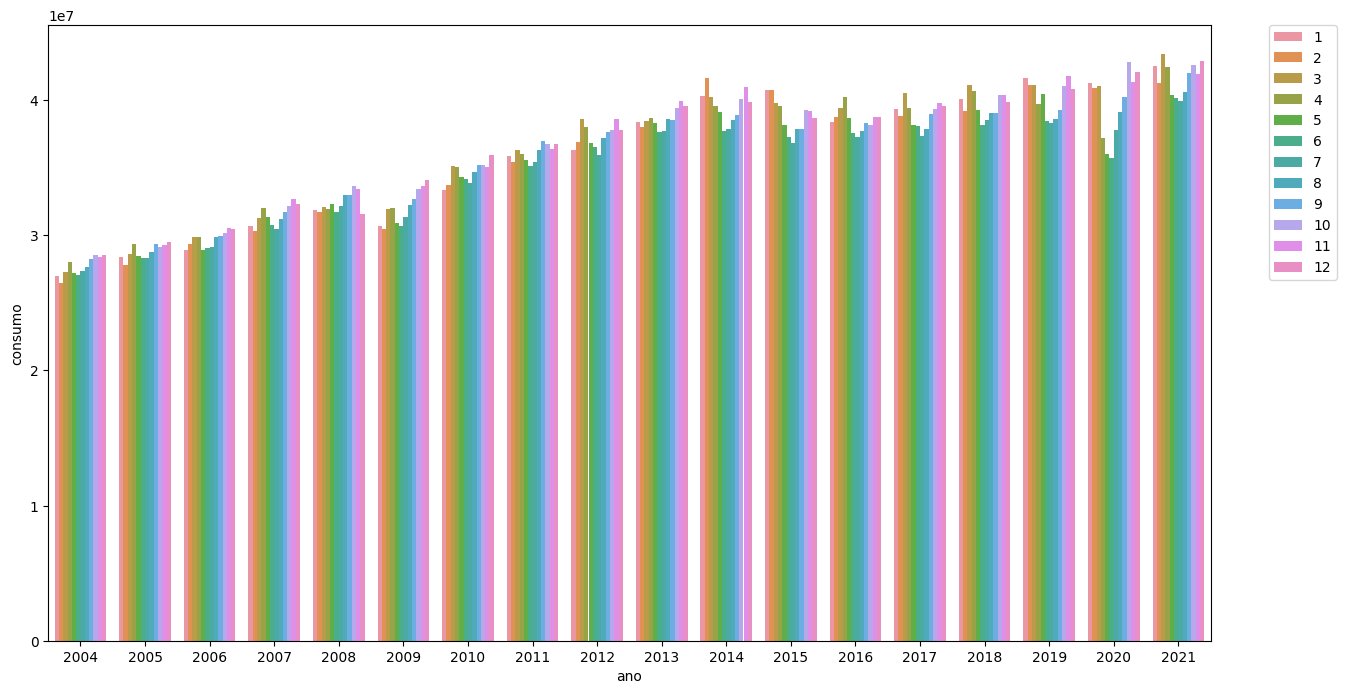

In [14]:
# Plotando a variação mensal por ano do consumo TOTAL de energia elétrica.
consumo_total = df_uf.query("tipo_consumo == 'Total'")
grafico = consumo_total.groupby(['ano','mes'], as_index=False, sort=False)['consumo'].sum()
plt.figure(figsize=(15,8))
sns.barplot(data=grafico, x="ano", y="consumo", hue="mes", ci=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [15]:
# Plotando o consumo TOTAL médio de todos os anos por mês.
plt.figure(figsize=(15,8))
consumo_total = df_uf.query("tipo_consumo == 'Total'")
grafico = consumo_total.groupby(['ano','mes'], as_index=False, sort=False)['consumo'].mean()
#df_mes = tipo.groupby('mes', as_index=False, sort=False).agg({'consumo':'sum'})
sns.lineplot(data=grafico, x="mes", y="consumo")

<Axes: xlabel='mes', ylabel='consumo'>

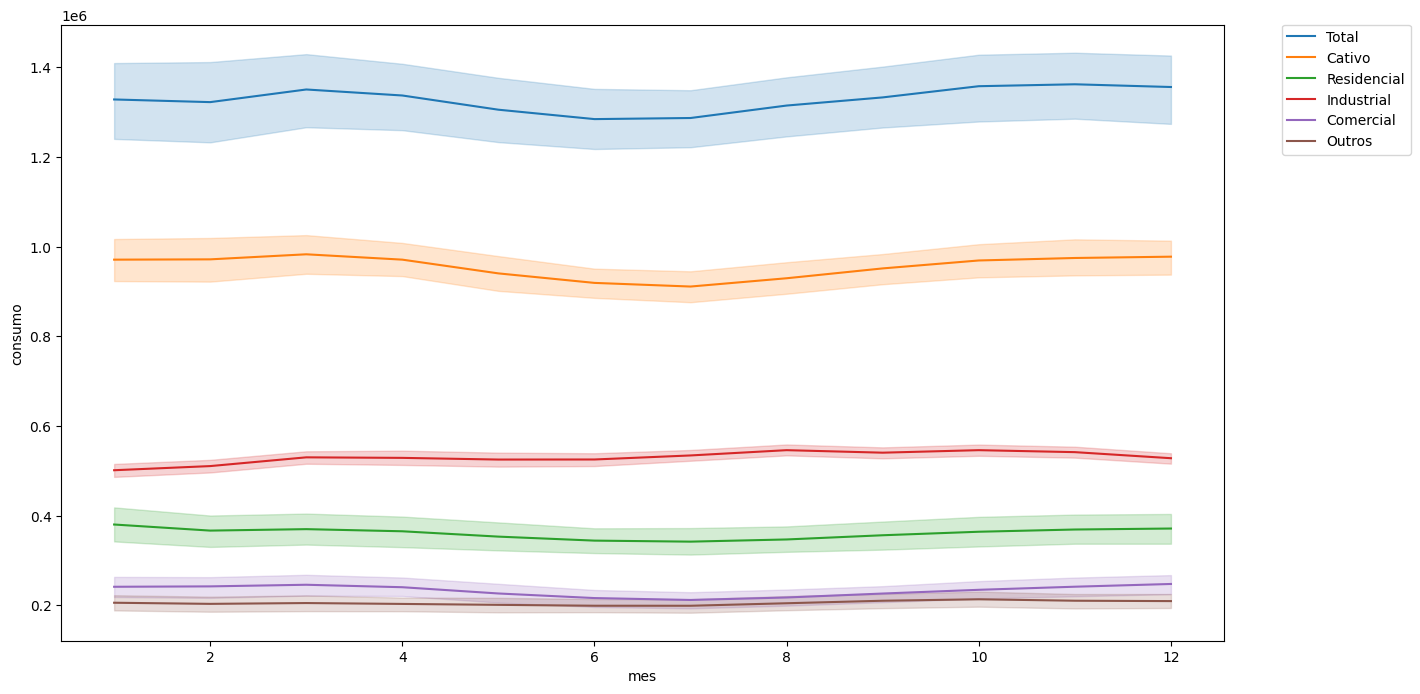

In [16]:
# Plotando a média de todos os anos por tipo de consumo por mês.
plt.figure(figsize=(15,8))
grafico = df_uf.groupby(['ano','mes','tipo_consumo'], as_index=False, sort=False)['consumo'].mean()
#df_mes = tipo.groupby('mes', as_index=False, sort=False).agg({'consumo':'sum'})
sns.lineplot(data=grafico, x="mes", y="consumo", hue="tipo_consumo")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<Axes: xlabel='mes', ylabel='consumo'>

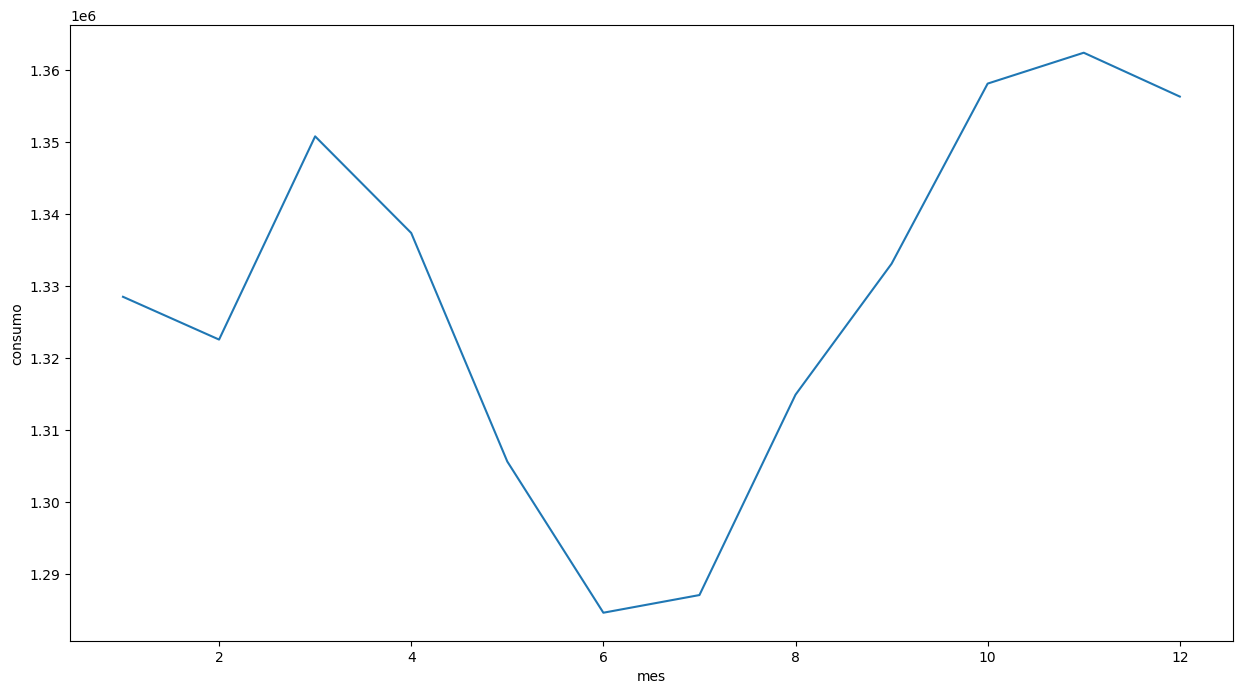

In [17]:
# Plotando o consumo TOTAL médio de todos os anos por mês.
plt.figure(figsize=(15,8))
df_mes = df_uf.query("tipo_consumo == 'Total'").groupby('mes', as_index=False, sort=False).agg({'consumo':'mean'})
sns.lineplot(data=df_mes, x="mes", y="consumo")

<Axes: xlabel='mes', ylabel='consumo'>

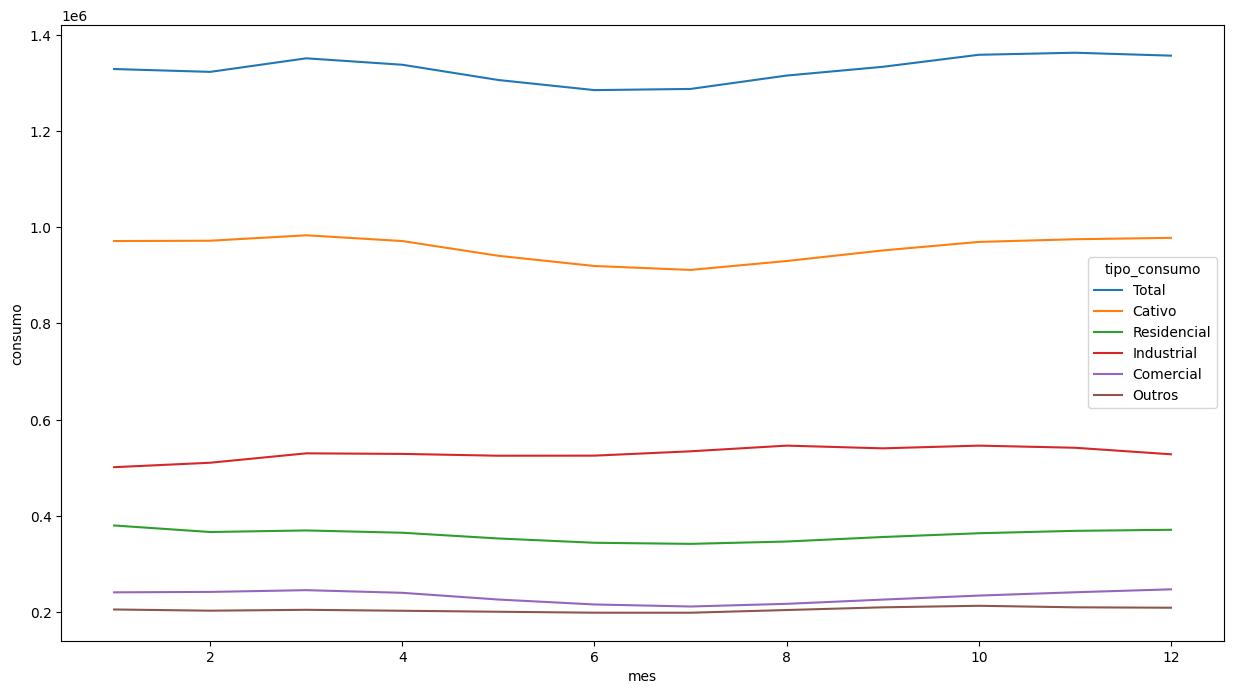

In [18]:
# Plotando o consumo médio de energia elétrica de todos os anos por mês.
plt.figure(figsize=(15,8))
df_mes = df_uf.groupby(['mes','tipo_consumo'], as_index=False, sort=False).agg({'consumo':'mean'})
sns.lineplot(data=df_mes, x="mes", y="consumo", hue="tipo_consumo")

In [19]:
df_mes.head(20)

mes tipo_consumo       consumo
0     1        Total  1.328509e+06
1     2        Total  1.322574e+06
2     3        Total  1.350764e+06
3     4        Total  1.337362e+06
4     5        Total  1.305660e+06
5     6        Total  1.284683e+06
6     7        Total  1.287134e+06
7     8        Total  1.314927e+06
8     9        Total  1.333097e+06
9    10        Total  1.358085e+06
10   11        Total  1.362367e+06
11   12        Total  1.356283e+06
12    1       Cativo  9.711205e+05
13    2       Cativo  9.717862e+05
14    3       Cativo  9.830716e+05
15    4       Cativo  9.711231e+05
16    5       Cativo  9.404734e+05
17    6       Cativo  9.192622e+05
18    7       Cativo  9.111376e+05
19    8       Cativo  9.296276e+05

In [20]:
df_uf['sigla_uf'].unique().tolist()

['RO',
 'AC',
 'AM',
 'RR',
 'PA',
 'AP',
 'TO',
 'MA',
 'PI',
 'CE',
 'RN',
 'PB',
 'PE',
 'AL',
 'SE',
 'BA',
 'MG',
 'ES',
 'RJ',
 'SP',
 'PR',
 'SC',
 'RS',
 'MS',
 'MT',
 'GO',
 'DF']

In [21]:
df_uf["regiao"]= df_uf["sigla_uf"].map({   
    'RO':'Norte','AC':'Norte','AM':'Norte','RR':'Norte','PA':'Norte','AP':'Norte','TO':'Norte',
    'MA':'Nordeste','PI':'Nordeste','CE':'Nordeste','RN':'Nordeste','PB':'Nordeste','PE':'Nordeste','AL':'Nordeste','SE':'Nordeste','BA':'Nordeste',
    'MG':'Sudeste','ES':'Sudeste','RJ':'Sudeste','SP':'Sudeste',
    'PR':'Sul','SC':'Sul','RS':'Sul',
    'MS':'Centro-oeste','MT':'Centro-oeste','GO':'Centro-oeste','DF':'Centro-oeste'})

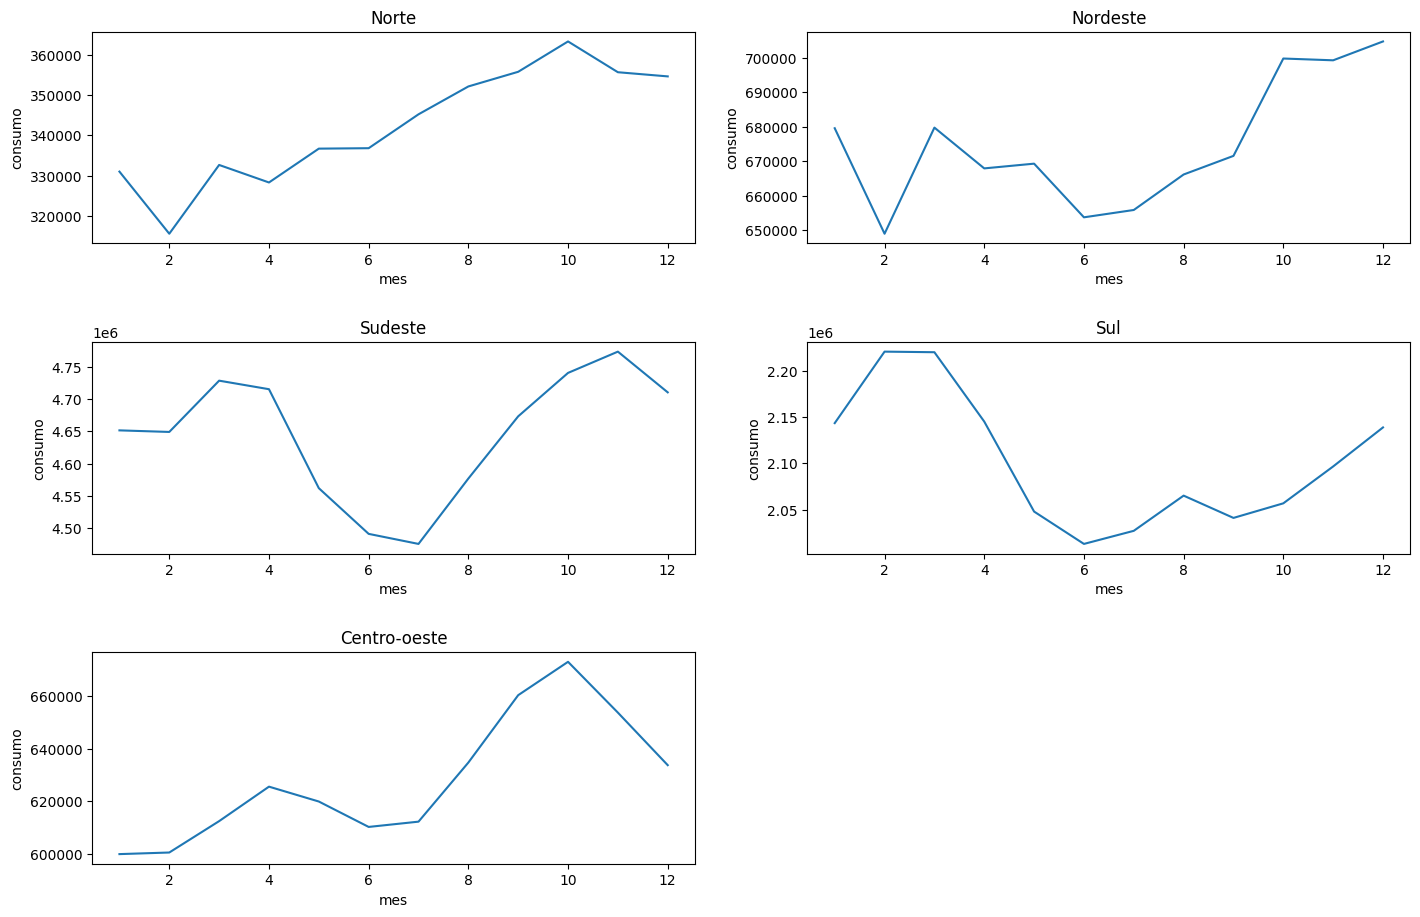

In [22]:
# Plotando a média de consumo de todos os anos por mês por REGIÃO.
consumo_total = df_uf.query("tipo_consumo == 'Total'")
grafico = consumo_total.groupby(['mes','regiao'], as_index=False, sort=False)['consumo'].mean()

names = grafico['regiao'].unique().tolist()
fig, axes = plt.subplots(3,2, figsize=(15,10))
axes[-1, -1].axis('off')
fig.tight_layout(pad=5.0)
for name, ax in zip(names, axes.flatten()):
    grafico2 = grafico[grafico["regiao"] == name] 
    sns.lineplot(data=grafico2, x="mes", y="consumo", ax=ax).set(title=name)


<Axes: xlabel='data', ylabel='consumo'>

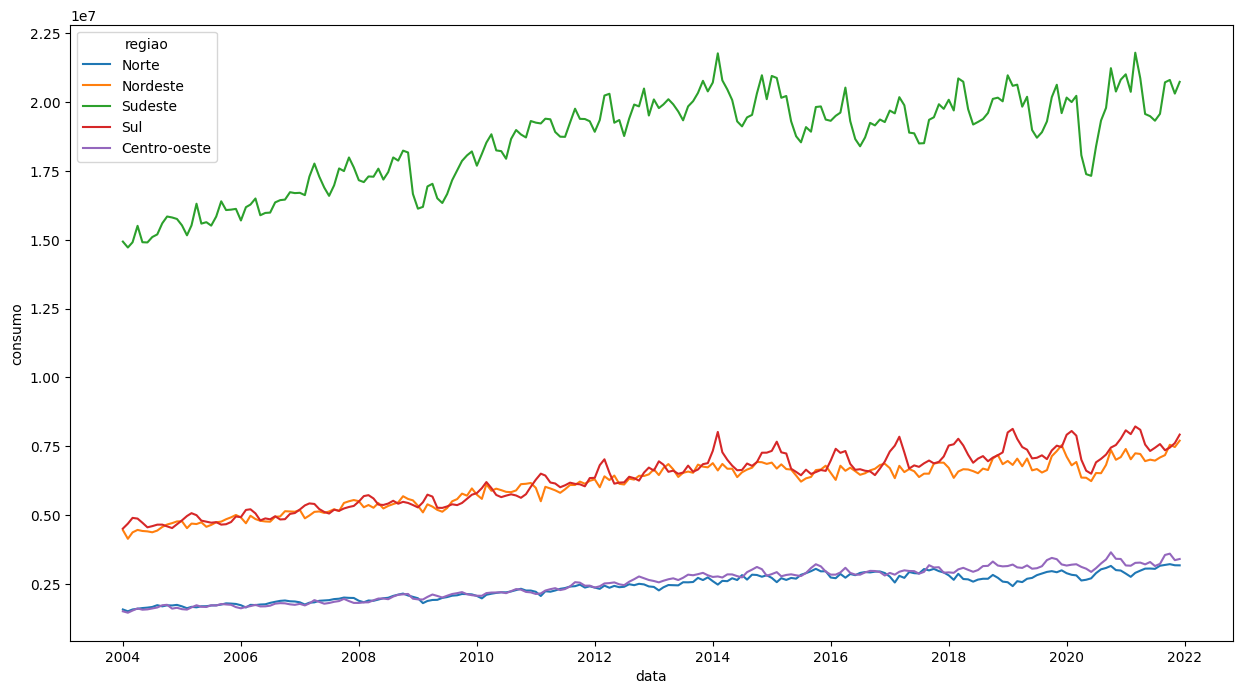

In [23]:
# Plotando a evolução do consumo TOTAL de energia elétrica por REGIÃO ao longo dos anos.
consumo_total = df_uf.query("tipo_consumo == 'Total'")
grafico = consumo_total.groupby(['data','regiao'], as_index=False, sort=False)['consumo'].sum()
plt.figure(figsize=(15,8))
sns.lineplot(data=grafico, x="data", y="consumo", hue="regiao", ci=None)

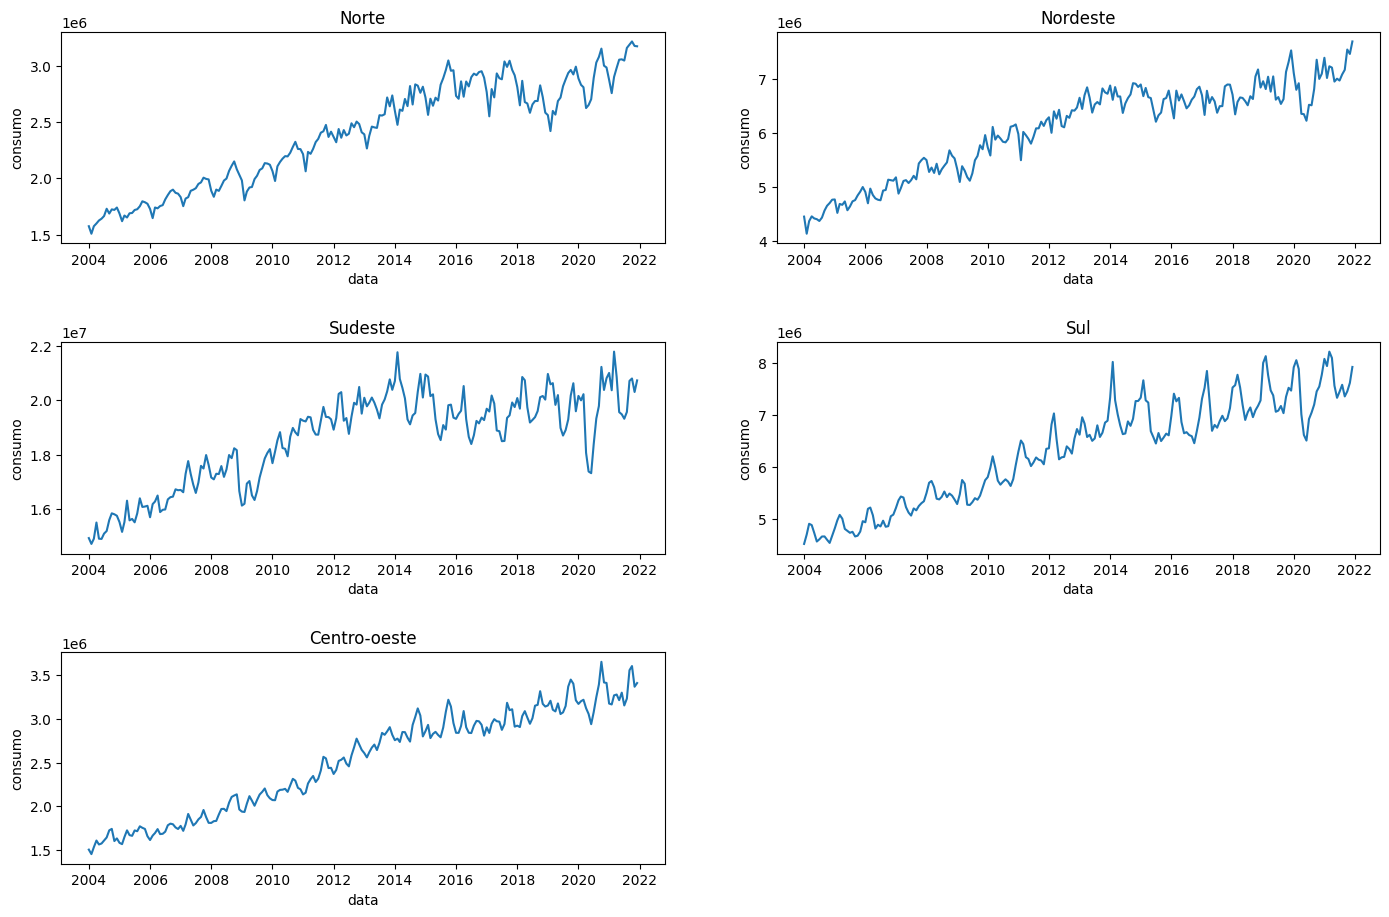

In [24]:
# Plotando a evolução do consumo TOTAL por REGIÃO.
consumo_total = df_uf.query("tipo_consumo == 'Total'")
grafico = consumo_total.groupby(['data','regiao'], as_index=False, sort=False)['consumo'].sum()

names = grafico['regiao'].unique().tolist()
fig, axes = plt.subplots(3,2, figsize=(15,10))
axes[-1, -1].axis('off')
fig.tight_layout(pad=5.0)
for name, ax in zip(names, axes.flatten()):
    grafico2 = grafico[grafico["regiao"] == name] 
    sns.lineplot(data=grafico2, x="data", y="consumo", ax=ax).set(title=name)

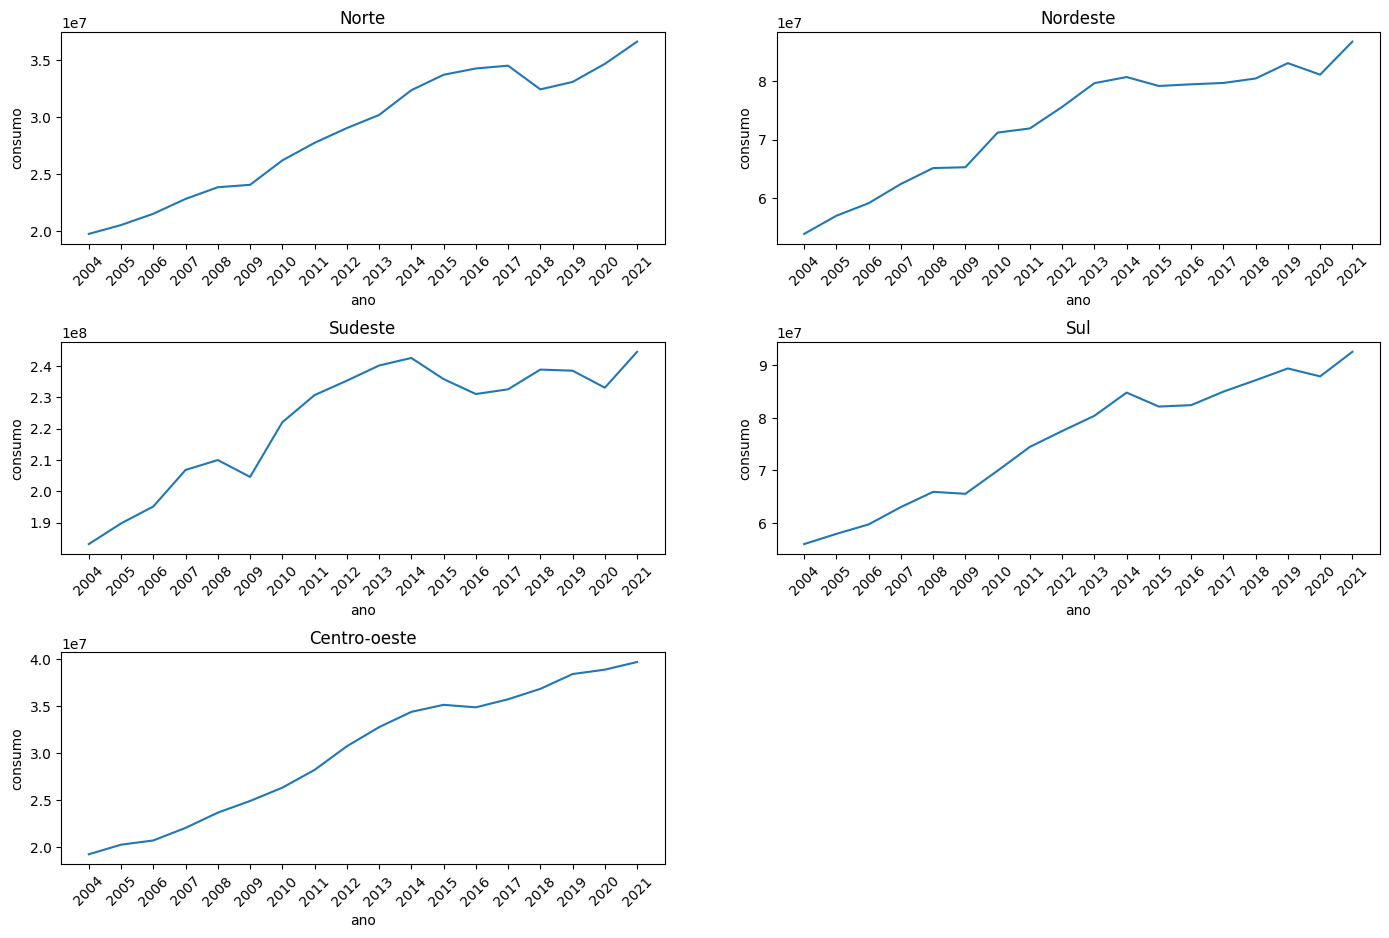

In [25]:
# Plotando a evolução do consumo ANUAL TOTAL por REGIÃO.
consumo_total = df_uf.query("tipo_consumo == 'Total'")
grafico = consumo_total.groupby(['ano','regiao'], as_index=False, sort=False)['consumo'].sum()

names = grafico['regiao'].unique().tolist()
fig, axes = plt.subplots(3,2, figsize=(15,10))
axes[-1, -1].axis('off')
fig.tight_layout(pad=5.0)
for name, ax in zip(names, axes.flatten()):
    grafico2 = grafico[grafico["regiao"] == name] 
    sns.lineplot(data=grafico2, x="ano", y="consumo", ax=ax).set(title=name)
    ax.set(xticks=grafico2.ano.values)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)  

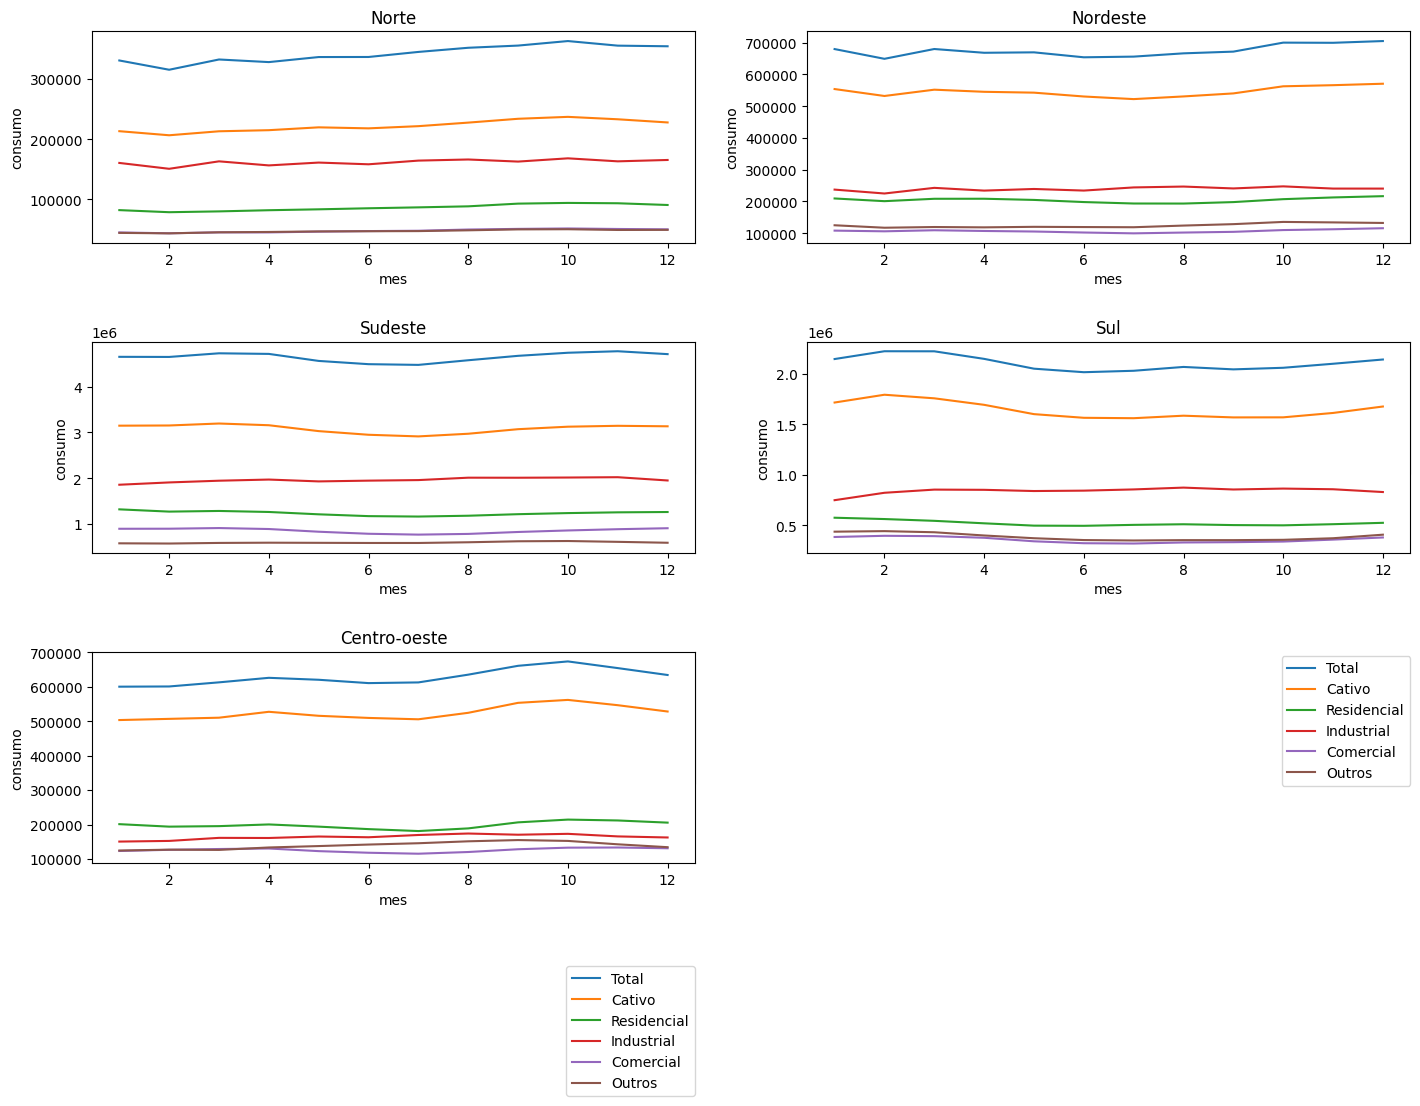

In [26]:
# Plotando o consumo médio de todos os anos por mês por TIPO e por REGIÃO. 
grafico = df_uf.groupby(['regiao','mes','tipo_consumo'], as_index=False, sort=False)['consumo'].mean()

names = grafico['regiao'].unique().tolist()
fig, axes = plt.subplots(3,2, figsize=(15,10))
axes[-1, -1].axis('off')
fig.tight_layout(pad=5.0)
for name, ax in zip(names, axes.flatten()):
    grafico2 = grafico[grafico["regiao"] == name] 
    sns.lineplot(data=grafico2, x="mes", y="consumo", hue="tipo_consumo", ax=ax).set(title=name)
    ax.legend(bbox_to_anchor=(1, -1.1), loc=4, borderaxespad=0.)

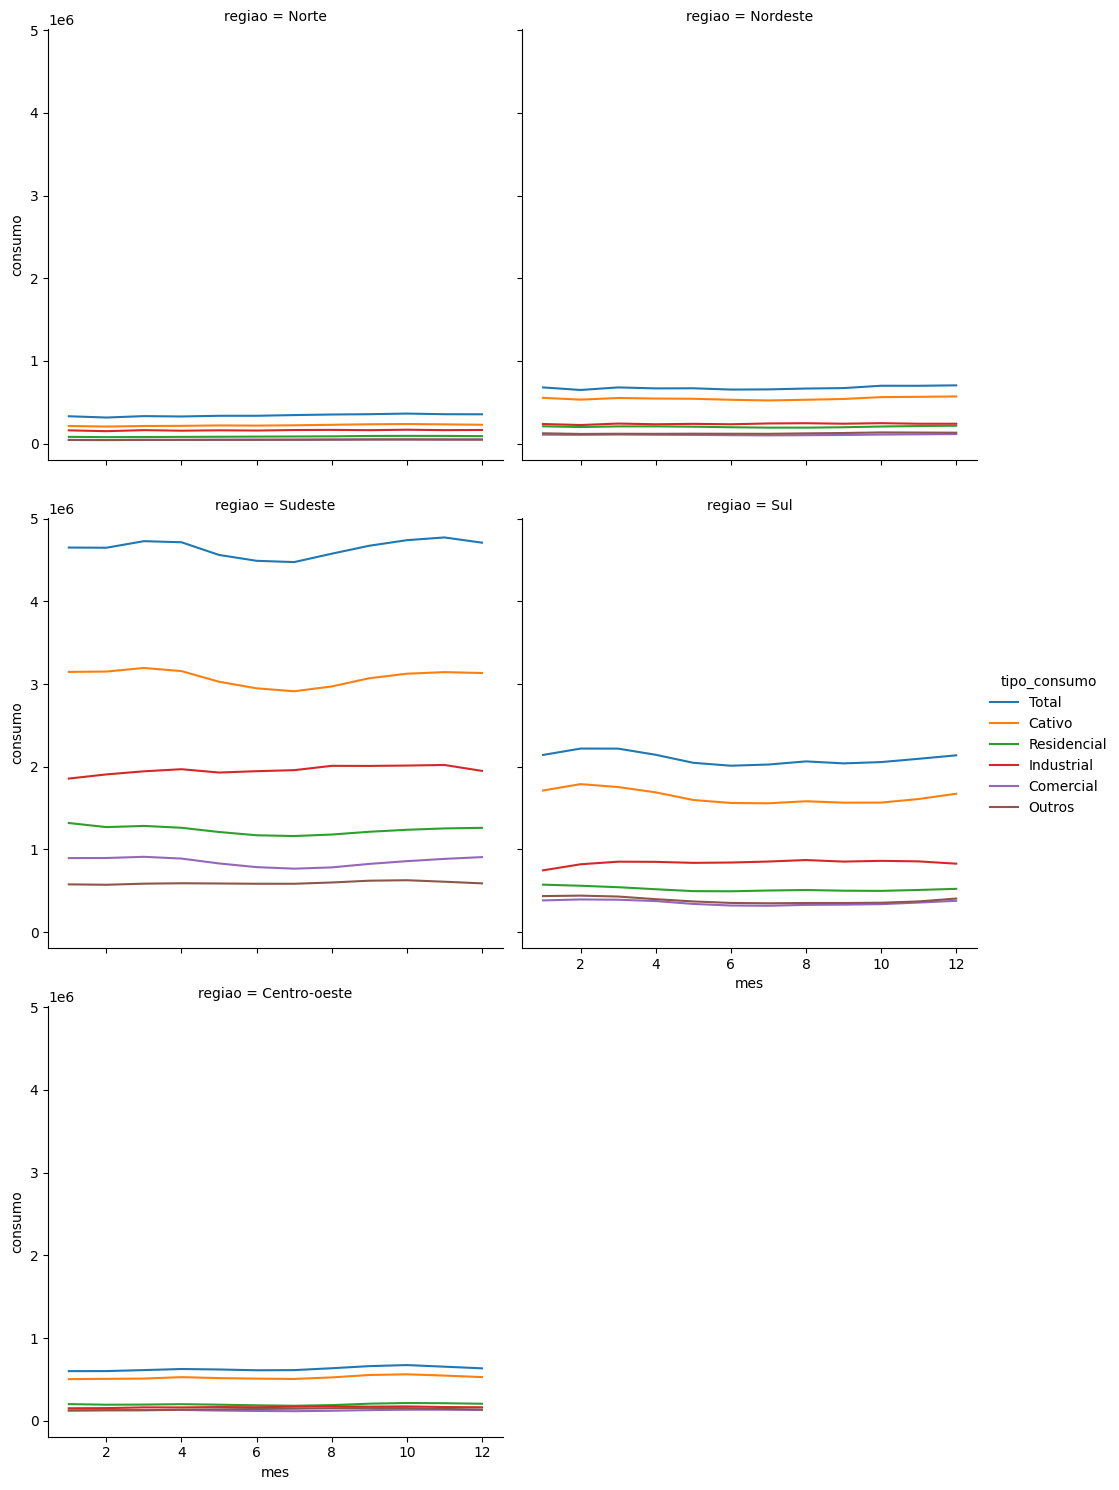

In [27]:
# Plotando o consumo médio de todos os anos por mês por TIPO e por REGIÃO (mesma escala)
grafico = df_uf.groupby(['mes','regiao', 'tipo_consumo'], as_index=False, sort=False)['consumo'].mean()
rel = sns.relplot(data=grafico, x="mes", y="consumo", hue="tipo_consumo", col="regiao", col_wrap=2, kind="line")

In [28]:
# Carregando dataset
df_pib1 = pd.read_excel("IBGE\PIB dos Municípios - base de dados 2002-2009.xls", header=None)
df_pib2 = pd.read_excel("IBGE\PIB dos Municípios - base de dados 2010-2020.xls", header=None)

In [29]:
df_pib1

0                        1                      2    
0       Ano  Código da Grande Região  Nome da Grande Região  \
1      2002                        1                  Norte   
2      2002                        1                  Norte   
3      2002                        1                  Norte   
4      2002                        1                  Norte   
...     ...                      ...                    ...   
44497  2009                        5           Centro-oeste   
44498  2009                        5           Centro-oeste   
44499  2009                        5           Centro-oeste   
44500  2009                        5           Centro-oeste   
44501  2009                        5           Centro-oeste   

                                   3                              4    
0      Código da Unidade da Federação  Sigla da Unidade da Federação  \
1                                  11                             RO   
2                                  11                             RO   
3                                  11                             RO   
4                                  11                             RO   
...                               ...                            ...   
44497                              52                             GO   
44498                              52                             GO   
44499                              52                             GO   
44500                              52                             GO   
44501                              53                             DF   

                                 5                    6    
0      Nome da Unidade da Federação  Código do Município  \
1                          Rondônia              1100015   
2                          Rondônia              1100023   
3                          Rondônia              1100031   
4                          Rondônia              1100049   
...                             ...                  ...   
44497                         Goiás              5222005   
44498                         Goiás              5222054   
44499                         Goiás              5222203   
44500                         Goiás              5222302   
44501              Distrito Federal              5300108   

                          7    
0          Nome do Município  \
1      Alta Floresta D'Oeste   
2                  Ariquemes   
3                     Cabixi   
4                     Cacoal   
...                      ...   
44497             Vianópolis   
44498         Vicentinópolis   
44499               Vila Boa   
44500          Vila Propício   
44501               Brasília   

                                                      8    
0                                   Região Metropolitana  \
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
44497                                                NaN   
44498                                                NaN   
44499  Região Integrada de Desenvolvimento do Distrit...   
44500  Região Integrada de Desenvolvimento do Distrit...   
44501  Região Integrada de Desenvolvimento do Distrit...   

                          9   ...         30                          31   
0      Código da Mesorregião  ...  Semiárido  Cidade-Região de São Paulo  \
1                       1102  ...        Não                         Não   
2                       1102  ...        Não                         Não   
3                       1102  ...        Não                         Não   
4                       1102  ...        Não                         Não   
...                      ...  ...        ...                         ...   
44497                   5205

In [30]:
df_pib2

0                        1                      2    
0       Ano  Código da Grande Região  Nome da Grande Região  \
1      2010                        1                  Norte   
2      2010                        1                  Norte   
3      2010                        1                  Norte   
4      2010                        1                  Norte   
...     ...                      ...                    ...   
61251  2020                        5           Centro-oeste   
61252  2020                        5           Centro-oeste   
61253  2020                        5           Centro-oeste   
61254  2020                        5           Centro-oeste   
61255  2020                        5           Centro-oeste   

                                   3                              4    
0      Código da Unidade da Federação  Sigla da Unidade da Federação  \
1                                  11                             RO   
2                                  11                             RO   
3                                  11                             RO   
4                                  11                             RO   
...                               ...                            ...   
61251                              52                             GO   
61252                              52                             GO   
61253                              52                             GO   
61254                              52                             GO   
61255                              53                             DF   

                                 5                    6    
0      Nome da Unidade da Federação  Código do Município  \
1                          Rondônia              1100015   
2                          Rondônia              1100023   
3                          Rondônia              1100031   
4                          Rondônia              1100049   
...                             ...                  ...   
61251                         Goiás              5222005   
61252                         Goiás              5222054   
61253                         Goiás              5222203   
61254                         Goiás              5222302   
61255              Distrito Federal              5300108   

                          7    
0          Nome do Município  \
1      Alta Floresta D'Oeste   
2                  Ariquemes   
3                     Cabixi   
4                     Cacoal   
...                      ...   
61251             Vianópolis   
61252         Vicentinópolis   
61253               Vila Boa   
61254          Vila Propício   
61255               Brasília   

                                                      8    
0                                   Região Metropolitana  \
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
61251                                                NaN   
61252                                                NaN   
61253  Região Integrada de Desenvolvimento do Distrit...   
61254  Região Integrada de Desenvolvimento do Distrit...   
61255  Região Integrada de Desenvolvimento do Distrit...   

                          9   ...   
0      Código da Mesorregião  ...  \
1                       1102  ...   
2                       1102  ...   
3                       1102  ...   
4                       1102  ...   
...                      ...  ...   
61251                   5205  ...   
61252                   5205  ...   
61253                   5204  ...   
61254                   5204  ...   
61255                   5301  ...   

                                                      33   
0      Valor adicionado bruto da Indústria,\na preços..

In [31]:
df_pib1a=df_pib1[[0,2,4,7,33,36,38,39]]
#df_pib1.rename(columns={df_pib1.columns[2]: 'Regiao', df_pib1.columns[4]: 'Estado', df_pib1.columns[7]: 'Municipio', df_pib1.columns[13]: 'Industria', df_pib1.columns[16]: 'PIB_Bruto', df_pib1.columns[18]: 'PIB_Corrente', df_pib1.columns[19]: 'PIB_Corrente_PerCapita'},inplace=True)
df_pib1a.rename(columns={0: 'Ano', 2: 'Regiao', 4: 'Estado', 7: 'Municipio', 33: 'PIB_Industria', 36: 'PIB_Bruto', 38: 'PIB_Corrente', 39: 'PIB_Corrente_PerCapita'},inplace=True)
df_pib1a.head()

Ano                 Regiao                         Estado   
0   Ano  Nome da Grande Região  Sigla da Unidade da Federação  \
1  2002                  Norte                             RO   
2  2002                  Norte                             RO   
3  2002                  Norte                             RO   
4  2002                  Norte                             RO   

               Municipio                                      PIB_Industria   
0      Nome do Município  Valor adicionado bruto da Indústria,\na preços...  \
1  Alta Floresta D'Oeste                                           9376.871   
2              Ariquemes                                          99922.936   
3                 Cabixi                                           1961.907   
4                 Cacoal                                          98292.764   

                                           PIB_Bruto   
0  Valor adicionado bruto total, \na preços corre...  \
1                                         103741.729   
2                                         406926.845   
3                                          29899.585   
4                                         424820.146   

                                        PIB_Corrente   
0  Produto Interno Bruto, \na preços correntes\n(...  \
1                                         111290.995   
2                                         449592.816   
3                                           31767.52   
4                                         474443.097   

                              PIB_Corrente_PerCapita  
0  Produto Interno Bruto per capita, \na preços c...  
1                                            4047.83  
2                                            5667.37  
3                                            4246.99  
4                                            6353.27

In [32]:
df_pib1a=df_pib1a.drop([0]).reset_index(drop=True)
df_pib1a.head()

Ano Regiao Estado              Municipio PIB_Industria   PIB_Bruto   
0  2002  Norte     RO  Alta Floresta D'Oeste      9376.871  103741.729  \
1  2002  Norte     RO              Ariquemes     99922.936  406926.845   
2  2002  Norte     RO                 Cabixi      1961.907   29899.585   
3  2002  Norte     RO                 Cacoal     98292.764  424820.146   
4  2002  Norte     RO             Cerejeiras      6651.475   70972.643   

  PIB_Corrente PIB_Corrente_PerCapita  
0   111290.995                4047.83  
1   449592.816                5667.37  
2     31767.52                4246.99  
3   474443.097                6353.27  
4    79173.614                4442.47

In [33]:
df_pib2a=df_pib2[[0,2,4,7,33,36,38,39]]
df_pib2a.rename(columns={0: 'Ano', 2: 'Regiao', 4: 'Estado', 7: 'Municipio', 33: 'PIB_Industria', 36: 'PIB_Bruto', 38: 'PIB_Corrente', 39: 'PIB_Corrente_PerCapita'},inplace=True)
df_pib2a.head()

Ano                 Regiao                         Estado   
0   Ano  Nome da Grande Região  Sigla da Unidade da Federação  \
1  2010                  Norte                             RO   
2  2010                  Norte                             RO   
3  2010                  Norte                             RO   
4  2010                  Norte                             RO   

               Municipio                                      PIB_Industria   
0      Nome do Município  Valor adicionado bruto da Indústria,\na preços...  \
1  Alta Floresta D'Oeste                                          16118.534   
2              Ariquemes                                         287138.585   
3                 Cabixi                                           3252.506   
4                 Cacoal                                         182051.537   

                                           PIB_Bruto   
0  Valor adicionado bruto total, \na preços corre...  \
1                                         241119.767   
2                                        1199664.227   
3                                          65400.772   
4                                        1041212.374   

                                        PIB_Corrente   
0  Produto Interno Bruto, \na preços correntes\n(...  \
1                                         262076.878   
2                                         1364693.78   
3                                          69611.114   
4                                        1186494.091   

                              PIB_Corrente_PerCapita  
0  Produto Interno Bruto per capita, \na preços c...  
1                                           10731.18  
2                                           15103.86  
3                                           11033.62  
4                                           15095.15

In [34]:
df_pib2a=df_pib2a.drop([0]).reset_index(drop=True)
df_pib2a.head()

Ano Regiao Estado              Municipio PIB_Industria    PIB_Bruto   
0  2010  Norte     RO  Alta Floresta D'Oeste     16118.534   241119.767  \
1  2010  Norte     RO              Ariquemes    287138.585  1199664.227   
2  2010  Norte     RO                 Cabixi      3252.506    65400.772   
3  2010  Norte     RO                 Cacoal    182051.537  1041212.374   
4  2010  Norte     RO             Cerejeiras     19734.484    192454.16   

  PIB_Corrente PIB_Corrente_PerCapita  
0   262076.878               10731.18  
1   1364693.78               15103.86  
2    69611.114               11033.62  
3  1186494.091               15095.15  
4   222021.189               13037.06

In [35]:
df_pib=pd.concat([df_pib1a, df_pib2a]).reset_index(drop=True)
df_pib

Ano        Regiao Estado              Municipio PIB_Industria   
0       2002         Norte     RO  Alta Floresta D'Oeste      9376.871  \
1       2002         Norte     RO              Ariquemes     99922.936   
2       2002         Norte     RO                 Cabixi      1961.907   
3       2002         Norte     RO                 Cacoal     98292.764   
4       2002         Norte     RO             Cerejeiras      6651.475   
...      ...           ...    ...                    ...           ...   
105751  2020  Centro-oeste     GO             Vianópolis     31361.868   
105752  2020  Centro-oeste     GO         Vicentinópolis       75908.8   
105753  2020  Centro-oeste     GO               Vila Boa     22836.748   
105754  2020  Centro-oeste     GO          Vila Propício     26939.727   
105755  2020  Centro-oeste     DF               Brasília  10942472.569   

            PIB_Bruto   PIB_Corrente PIB_Corrente_PerCapita  
0          103741.729     111290.995                4047.83  
1          406926.845     449592.816                5667.37  
2           29899.585       31767.52                4246.99  
3          424820.146     474443.097                6353.27  
4           70972.643      79173.614                4442.47  
...               ...            ...                    ...  
105751     536634.496     587312.975               42019.96  
105752     385181.527     418556.871               47171.97  
105753     114318.384     121887.182               19310.39  
105754      209735.73     218473.479               37142.72  
105755  240381106.228  265847334.003               87016.16  

[105756 rows x 8 columns]

In [36]:
df_pib['Populacao'] = df_pib['PIB_Corrente']/df_pib['PIB_Corrente_PerCapita']
df_pib

Ano        Regiao Estado              Municipio PIB_Industria   
0       2002         Norte     RO  Alta Floresta D'Oeste      9376.871  \
1       2002         Norte     RO              Ariquemes     99922.936   
2       2002         Norte     RO                 Cabixi      1961.907   
3       2002         Norte     RO                 Cacoal     98292.764   
4       2002         Norte     RO             Cerejeiras      6651.475   
...      ...           ...    ...                    ...           ...   
105751  2020  Centro-oeste     GO             Vianópolis     31361.868   
105752  2020  Centro-oeste     GO         Vicentinópolis       75908.8   
105753  2020  Centro-oeste     GO               Vila Boa     22836.748   
105754  2020  Centro-oeste     GO          Vila Propício     26939.727   
105755  2020  Centro-oeste     DF               Brasília  10942472.569   

            PIB_Bruto   PIB_Corrente PIB_Corrente_PerCapita    Populacao  
0          103741.729     111290.995                4047.83    27.493989  
1          406926.845     449592.816                5667.37    79.330062  
2           29899.585       31767.52                4246.99     7.480008  
3          424820.146     474443.097                6353.27    74.676993  
4           70972.643      79173.614                4442.47    17.821981  
...               ...            ...                    ...          ...  
105751     536634.496     587312.975               42019.96       13.977  
105752     385181.527     418556.871               47171.97        8.873  
105753     114318.384     121887.182               19310.39        6.312  
105754      209735.73     218473.479               37142.72        5.882  
105755  240381106.228  265847334.003               87016.16  3055.148998  

[105756 rows x 9 columns]

In [37]:
df_pib_uf = df_pib.groupby(['Ano','Regiao','Estado'], as_index=False, sort=False).agg({'PIB_Industria':'sum', 'PIB_Bruto':'sum', 'PIB_Corrente':'sum', 'Populacao':'sum'})
df_pib_uf

Ano        Regiao Estado PIB_Industria      PIB_Bruto   PIB_Corrente   
0    2002         Norte     RO   1191090.432    6627898.698    7467629.886  \
1    2002         Norte     AC    355041.179    2742830.264    2971301.277   
2    2002         Norte     AM   7770508.485   18216345.208   22093338.008   
3    2002         Norte     RR    334225.265    2217673.211    2392032.671   
4    2002         Norte     PA   6127765.556   23913864.078   26482158.871   
..    ...           ...    ...           ...            ...            ...   
508  2020           Sul     RS  95234088.624  410001707.605  470941846.057   
509  2020  Centro-oeste     MS   23313710.73  109897457.185   122627726.08   
510  2020  Centro-oeste     MT  27663774.472  159608851.818    178649563.7   
511  2020  Centro-oeste     GO  47124851.599  199832733.139  224126112.041   
512  2020  Centro-oeste     DF  10942472.569  240381106.228  265847334.003   

        Populacao  
0     1450.754958  
1      609.350926  
2     3004.607314  
3      355.074957  
4     6549.093942  
..            ...  
508  11422.972907  
509   2809.394027  
510   3526.220058  
511   7113.540283  
512   3055.148998  

[513 rows x 7 columns]

In [38]:
df_pib_uf['PIB_Corrente_PerCapita'] = df_pib_uf['PIB_Corrente']/df_pib_uf['Populacao']
df_pib_uf

Ano        Regiao Estado PIB_Industria      PIB_Bruto   PIB_Corrente   
0    2002         Norte     RO   1191090.432    6627898.698    7467629.886  \
1    2002         Norte     AC    355041.179    2742830.264    2971301.277   
2    2002         Norte     AM   7770508.485   18216345.208   22093338.008   
3    2002         Norte     RR    334225.265    2217673.211    2392032.671   
4    2002         Norte     PA   6127765.556   23913864.078   26482158.871   
..    ...           ...    ...           ...            ...            ...   
508  2020           Sul     RS  95234088.624  410001707.605  470941846.057   
509  2020  Centro-oeste     MS   23313710.73  109897457.185   122627726.08   
510  2020  Centro-oeste     MT  27663774.472  159608851.818    178649563.7   
511  2020  Centro-oeste     GO  47124851.599  199832733.139  224126112.041   
512  2020  Centro-oeste     DF  10942472.569  240381106.228  265847334.003   

        Populacao PIB_Corrente_PerCapita  
0     1450.754958            5147.409522  
1      609.350926            4876.174218  
2     3004.607314            7353.153241  
3      355.074957            6736.697762  
4     6549.093942            4043.637044  
..            ...                    ...  
508  11422.972907           41227.607724  
509   2809.394027            43649.17306  
510   3526.220058           50663.191957  
511   7113.540283            31506.97165  
512   3055.148998               87016.16  

[513 rows x 8 columns]

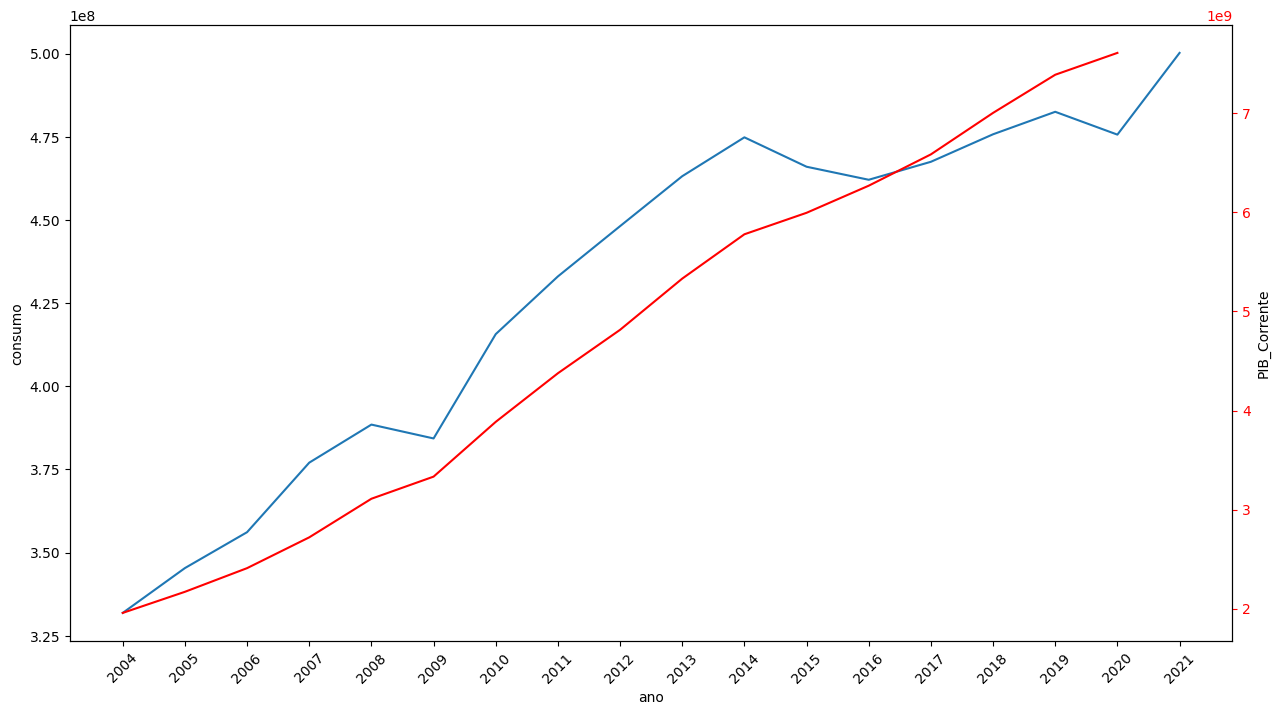

In [39]:
# Plotando a evolução do consumo TOTAL de energia elétrica ao longo dos anos em comparação com o PIB corrente.
consumo_total = df_uf.query("tipo_consumo == 'Total'")
grafico = consumo_total.groupby(['ano'], as_index=False, sort=False)['consumo'].sum()

grafico_pib = df_pib_uf[df_pib_uf["Ano"] > 2003]
grafico_pib.rename(columns={'Ano': 'ano'},inplace=True)
grafico_pib = grafico_pib.groupby(['ano'], as_index=False, sort=False)['PIB_Corrente'].sum()

fig, ax = plt.subplots(figsize=(15,8))
ax2 = ax.twinx()
sns.lineplot(data=grafico, x="ano", y="consumo", ax=ax)
sns.lineplot(data=grafico_pib, x="ano", y="PIB_Corrente", ax=ax2, color='r')
ax.set(xticks=grafico.ano.values)
ax2.tick_params(axis='y', colors='red')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)   

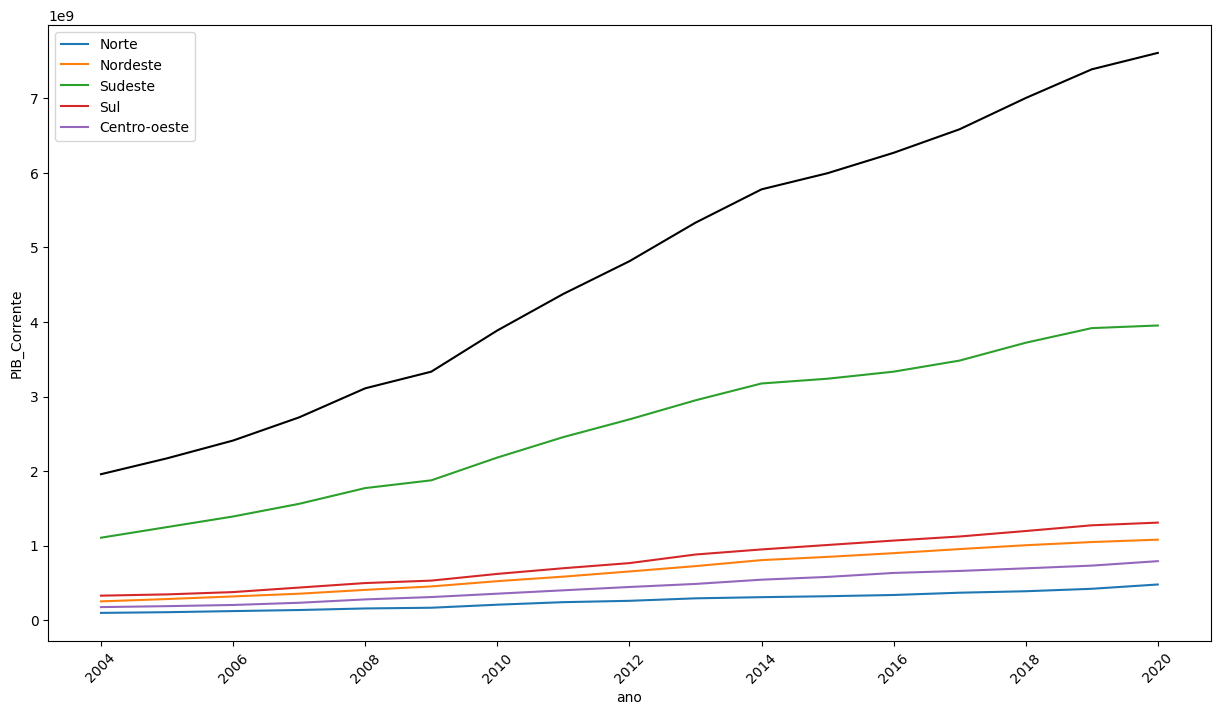

In [40]:
# Plotando a evolução do PIB por REGIÃO.

grafico = df_pib_uf[df_pib_uf["Ano"] > 2003]
grafico.rename(columns={'Ano': 'ano', 'Regiao' : 'regiao'},inplace=True)
grafico = grafico.groupby(['ano', 'regiao'], as_index=False, sort=False)['PIB_Corrente'].sum()
grafico_pib = df_pib_uf[df_pib_uf["Ano"] > 2003]
grafico_pib.rename(columns={'Ano': 'ano'},inplace=True)
grafico_pib = grafico_pib.groupby(['ano'], as_index=False, sort=False)['PIB_Corrente'].sum()

fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=grafico, x="ano", y="PIB_Corrente", hue="regiao", ax=ax)
sns.lineplot(data=grafico_pib, x="ano", y="PIB_Corrente", ax=ax, color='black')
# ax.set(xticks=grafico.ano.values)
for tick in ax.get_xticklabels():
    tick.set_rotation(45) 

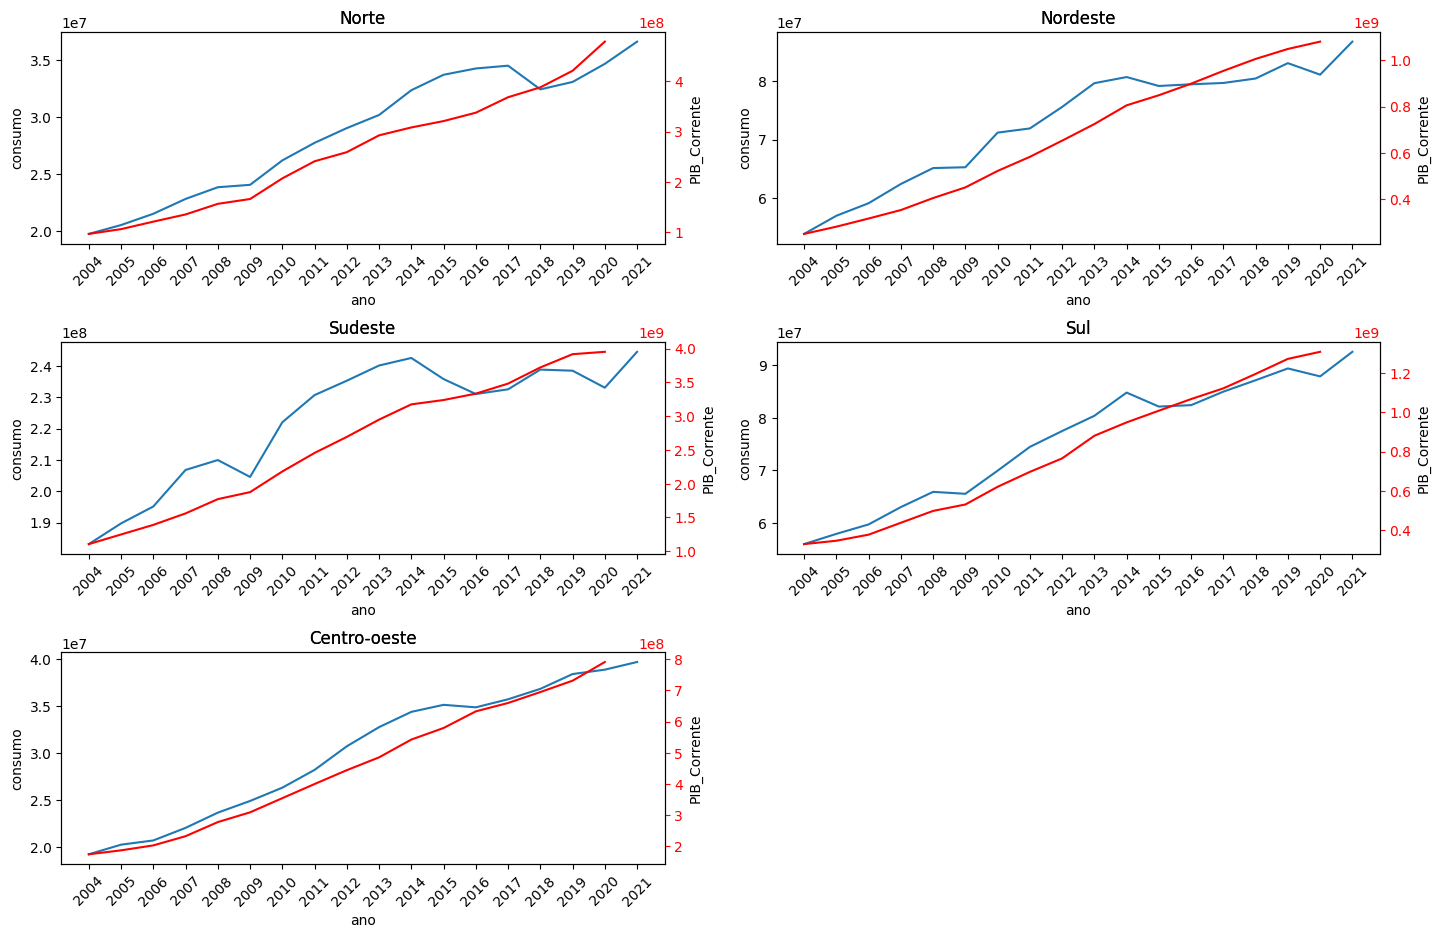

In [41]:
# Plotando a evolução do consumo TOTAL de energia elétrica por REGIÃO ao longo dos anos em comparação com o PIB corrente.
consumo_total = df_uf.query("tipo_consumo == 'Total'")
grafico = consumo_total.groupby(['ano','regiao'], as_index=False, sort=False)['consumo'].sum()

grafico_pib = df_pib_uf[df_pib_uf["Ano"] > 2003]
grafico_pib.rename(columns={'Ano': 'ano', 'Regiao':'regiao'},inplace=True)
grafico_pib = grafico_pib.groupby(['ano','regiao'], as_index=False, sort=False)['PIB_Corrente'].sum()

names = grafico['regiao'].unique().tolist()
fig, axes = plt.subplots(3,2, figsize=(15,10))
axes[-1, -1].axis('off')
fig.tight_layout(pad=5.0)
for name, ax in zip(names, axes.flatten()):
    grafico2 = grafico[grafico["regiao"] == name] 
    grafico_pib2 = grafico_pib[grafico_pib["regiao"] == name] 
    ax2 = ax.twinx()
    sns.lineplot(data=grafico2, x="ano", y="consumo", ax=ax).set(title=name)
    sns.lineplot(data=grafico_pib2, x="ano", y="PIB_Corrente", ax=ax2, color='r').set(title=name)
    ax.set(xticks=grafico2.ano.values)
    ax2.tick_params(axis='y', colors='red')
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)   

In [42]:
# Plotando a evolução do consumo TOTAL de energia elétrica por ESTADO ao longo dos anos em comparação com o PIB corrente.
consumo_total = df_uf.query("tipo_consumo == 'Total'")
grafico = consumo_total.groupby(['ano','sigla_uf'], as_index=False, sort=False)['consumo'].sum()
grafico.rename(columns={'sigla_uf': 'Estado'},inplace=True)

grafico_pib = df_pib_uf[df_pib_uf["Ano"] > 2003]
grafico_pib.rename(columns={'Ano': 'ano'},inplace=True)
grafico_pib = grafico_pib.groupby(['ano','Estado'], as_index=False, sort=False)['PIB_Corrente'].sum()

names = grafico['Estado'].unique().tolist()
fig, axes = plt.subplots(14,2, figsize=(15,40))
axes[-1, -1].axis('off')
fig.tight_layout(pad=5.0)
for name, ax in zip(names, axes.flatten()):
    grafico2 = grafico[grafico["Estado"] == name] 
    grafico_pib2 = grafico_pib[grafico_pib["Estado"] == name] 
    ax2 = ax.twinx()
    sns.lineplot(data=grafico2, x="ano", y="consumo", ax=ax).set(title=name)
    sns.lineplot(data=grafico_pib2, x="ano", y="PIB_Corrente", ax=ax2, color='r').set(title=name)
    ax.set(xticks=grafico2.ano.values)
    ax2.tick_params(axis='y', colors='red')
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)   

In [43]:
import sweetviz as sv
df = pd.read_csv("uf.csv", sep=",")
grouped = df.groupby(["ano", "mes"])["consumo"].sum().reset_index()
grouped["data"] = pd.to_datetime(grouped["ano"].astype(str) + "-" + grouped["mes"].astype(str), format="%Y-%m")
grouped["meses"] = (grouped["data"].dt.year - grouped["data"].dt.year.min()) * 12 + grouped["data"].dt.month
grouped = grouped.sort_values(by=["data"])
grouped = grouped.set_index("data")
grouped.index = pd.DatetimeIndex(grouped.index.values,freq=grouped.index.inferred_freq)
print(grouped)
# my_report = sv.analyze(grouped)
# my_report.show_html()

             ano  mes       consumo  meses
2004-01-01  2004    1  7.796380e+07      1
2004-02-01  2004    2  7.664933e+07      2
2004-03-01  2004    3  7.877854e+07      3
2004-04-01  2004    4  8.090425e+07      4
2004-05-01  2004    5  7.839372e+07      5
...          ...  ...           ...    ...
2021-08-01  2021    8  1.056880e+08    212
2021-09-01  2021    9  1.099435e+08    213
2021-10-01  2021   10  1.113236e+08    214
2021-11-01  2021   11  1.093301e+08    215
2021-12-01  2021   12  1.124507e+08    216

[216 rows x 4 columns]


In [44]:
# from sklearn.neural_network import MLPRegressor
# from sklearn.preprocessing import StandardScaler

# X = grouped[["meses"]]
# y = grouped["consumo"]
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
# model.fit(X_scaled, y)
# y_pred = model.predict(X_scaled)
# grouped["consumo_pred"] = y_pred
# print(grouped)

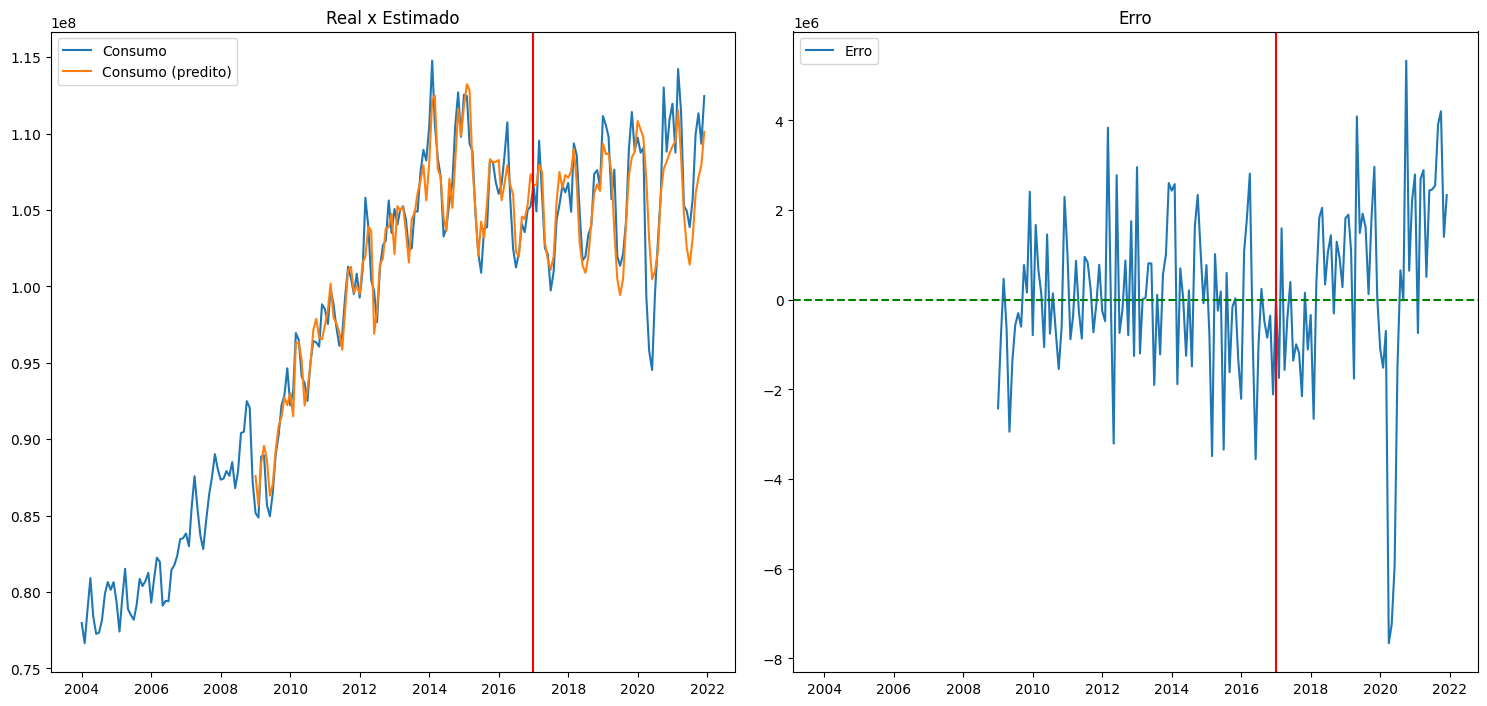

In [45]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import pacf 
from statsmodels.graphics.tsaplots import plot_pacf

# calculate PACF
pacf_coeffs = pacf(grouped["consumo"], nlags=107)
plot_pacf(grouped["consumo"], lags=107)
plt.show()


model = sm.tsa.AutoReg(grouped["consumo"], lags=60)
results = model.fit()
y_pred = results.predict(start=grouped.index.min(), end=grouped.index.max()+60*grouped.index.freq, dynamic="2017-01-01")
grouped["consumo_pred"] = y_pred
grouped["erro"] = grouped["consumo"] -grouped["consumo_pred"]
fig, axes = plt.subplots(1,2, figsize=(15,7), sharex=True)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title("Real x Estimado")
plt.plot(grouped.index, grouped["consumo"], label="Consumo")
plt.plot(grouped.index, grouped["consumo_pred"], label="Consumo (predito)")
plt.legend()
plt.axvline(x = "2017-01-01",color ='red')
plt.subplot(1, 2, 2)
plt.title("Erro")
plt.plot(grouped.index, grouped["erro"], label="Erro")
plt.axvline(x = "2017-01-01",color ='red')
plt.axhline(y = 0, color ="green", linestyle ="--")
plt.legend()
plt.show()
# results.summary()

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
model = SARIMAX(grouped['consumo'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Make forecast
forecast = results.get_forecast(steps=12)
forecast_ci = forecast.conf_int()
print(forecast.predicted_mean)

2022-01-01    1.141179e+08
2022-02-01    1.117110e+08
2022-03-01    1.161111e+08
2022-04-01    1.137483e+08
2022-05-01    1.086497e+08
2022-06-01    1.079322e+08
2022-07-01    1.071807e+08
2022-08-01    1.089884e+08
2022-09-01    1.124923e+08
2022-10-01    1.140213e+08
2022-11-01    1.126796e+08
2022-12-01    1.149183e+08
Freq: MS, Name: predicted_mean, dtype: float64


MAPE: 2.734894%


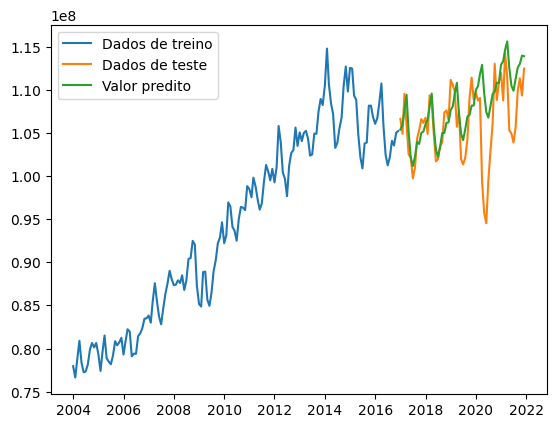

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load and preprocess data
df = pd.read_csv("uf.csv", sep=",")
grouped = df.groupby(["ano", "mes"])["consumo"].sum().reset_index()
grouped["data"] = pd.to_datetime(grouped["ano"].astype(str) + "-" + grouped["mes"].astype(str), format="%Y-%m")
grouped["meses"] = (grouped["data"].dt.year - grouped["data"].dt.year.min()) * 12 + grouped["data"].dt.month
grouped = grouped.sort_values(by=["data"])
grouped = grouped.set_index("data")
grouped.index = pd.DatetimeIndex(grouped.index.values,freq=grouped.index.inferred_freq)

# Split data into training and testing sets
train_end = grouped.index[-1] - pd.DateOffset(years=5)
train_data = grouped.loc[grouped.index <= train_end]
test_data = grouped.loc[grouped.index > train_end]

# Fit SARIMA model to training data
model = SARIMAX(train_data['consumo'], order=(1,1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Make predictions for test data
forecast = results.get_forecast(steps=len(test_data))
forecast_ci = forecast.conf_int()
predictions = forecast.predicted_mean
test_data['valor_predito']= predictions


#Error
import numpy as np
mape = np.mean(np.abs((test_data['consumo'] - test_data['valor_predito']) / test_data['consumo'])) * 100
print('MAPE: %f%%' % mape)

# Plot results
plt.plot(train_data['consumo'], label='Dados de treino')
plt.plot(test_data['consumo'], label='Dados de teste')
plt.plot(predictions, label='Valor predito')
plt.legend()
plt.show()

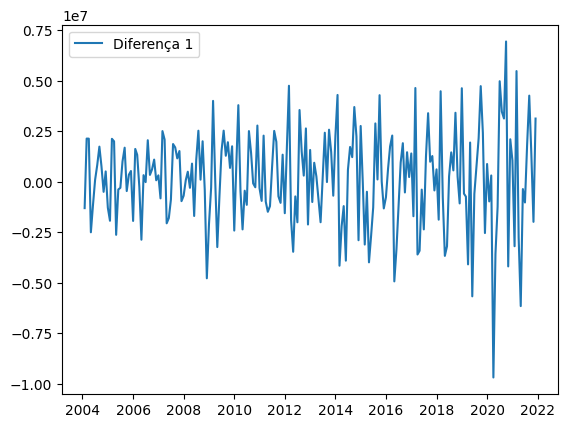

In [48]:
grouped['diferenca'] = grouped['consumo'].diff()
plt.plot(grouped['diferenca'], label='Diferença 1')
plt.legend()
plt.show()

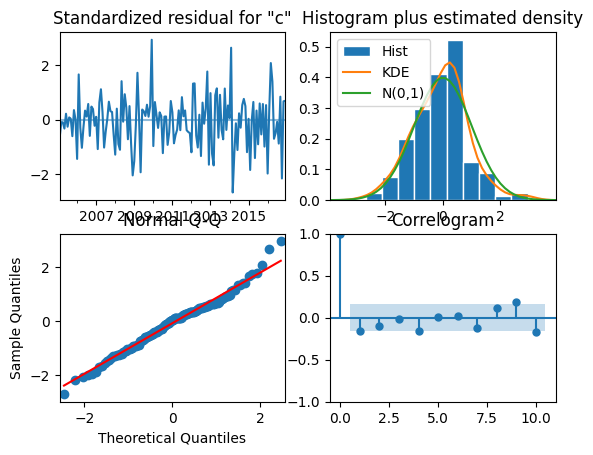

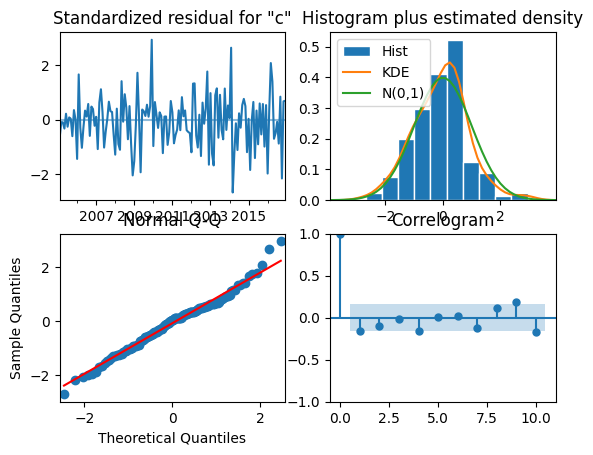

In [63]:
results.plot_diagnostics()

In [62]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            consumo   No. Observations:                  156
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2265.770
Date:                            Sun, 14 May 2023   AIC                           4541.540
Time:                                    12:11:15   BIC                           4556.354
Sample:                                01-01-2004   HQIC                          4547.560
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7308      1.899      0.385      0.700      -2.991       4.453
ma.L1         -0.7392      1.892     -0.391      0.696      -4.447       2.969
ar.S.L12       0.7554      0.075     10.028      0.000       0.608       0.903
ma.S.L12      -0.9555      0.150     -6.370      0.000      -1.250      -0.662
sigma2       3.67e+12   4.92e-13   7.46e+24      0.000    3.67e+12    3.67e+12
===================================================================================
Ljung-Box (L1) (Q):                   3.45   Jarque-Bera (JB):                 2.20
Prob(Q):                              0.06   Prob(JB):                         0.33
Heteroskedasticity (H):               2.03   Skew:                             0.08
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.16e+41. Standard errors may be unstable.
"""

In [49]:
#Distribuição estacionária?
#Teste de Dickey-Fuller aumentado
from statsmodels.tsa.stattools import adfuller
result = adfuller(grouped['diferenca'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('A série é estacionária' if result[1] < 0.05 else 'A série não é estacionária')

ADF Statistic: -4.176435
p-value: 0.000722
A série é estacionária


In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test_data['consumo'], test_data['valor_predito']))
mae = mean_absolute_error(test_data['consumo'], test_data['valor_predito'])
mape = np.mean(np.abs((test_data['consumo'] - test_data['valor_predito']) / test_data['consumo'])) * 100

print('RMSE: %f' % rmse)
print('MAE: %f' % mae)
print('MAPE: %f%%' % mape)

RMSE: 4135068.939371
MAE: 2836549.447331
MAPE: 2.734894%


In [51]:
#validação cruzada walk-forward para avaliar a precisão do modelo
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

# Dividindo os dados em conjuntos de treinamento e teste
n_test = 60
data = grouped['consumo']
train, test = data[:-n_test], data[-n_test:]

# Configurando os parâmetros do modelo SARIMA
order = (1, 0, 0)
seasonal_order = (1, 0, 1, 12)

history = [x for x in train]
predictions = []

# Validacao cruzada walk-forward
for t in range(len(test)):
    # Ajustando o modelo SARIMA
    model = SARIMAX(history, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    
    # Fazendo a previsao de um passo a frente
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    
    # Adicionando a observacao real ao historico para o proximo loop
    history.append(test[t])

# Calculando o erro medio quadratico (RMSE)
rmse = np.sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
mae = mean_absolute_error(test,predictions)
print('MAE: %f' % mae)
mape = np.mean(np.abs((test - predictions) / test)) * 100
print('MAPE: %f%%' % mape)

RMSE: 2679768.648
MAE: 2062955.086730
MAPE: 1.942516%


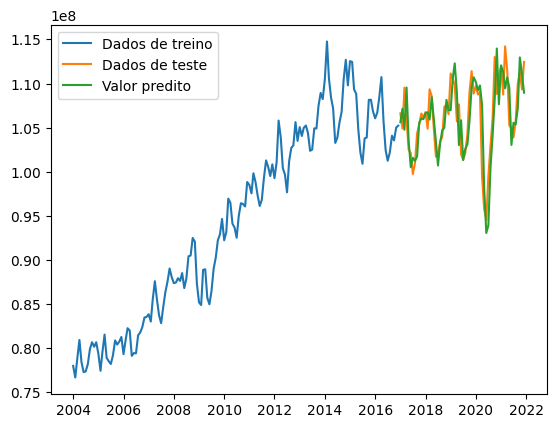

In [52]:
plt.plot(train, label='Dados de treino')
plt.plot(test, label='Dados de teste')
plt.plot(test.index, predictions, label='Valor predito')
plt.legend()
plt.show()

In [53]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  215
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood               -3432.280
Date:                              Sun, 14 May 2023   AIC                           6872.559
Time:                                      11:32:53   BIC                           6886.042
Sample:                                           0   HQIC                          6878.007
                                              - 215                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9953      0.008    123.304      0.000       0.979       1.011
ar.S.L12       0.9425      0.057     16.432      0.000       0.830       1.055
ma.S.L12      -0.7204      0.117     -6.136      0.000      -0.950      -0.490
sigma2      5.458e+12   4.82e-15   1.13e+27      0.000    5.46e+12    5.46e+12
===================================================================================
Ljung-Box (L1) (Q):                   4.23   Jarque-Bera (JB):                25.24
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               3.40   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.09e+42. Standard errors may be unstable.
"""

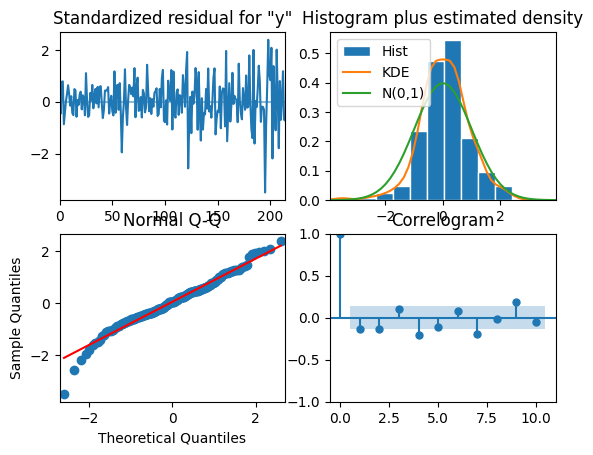

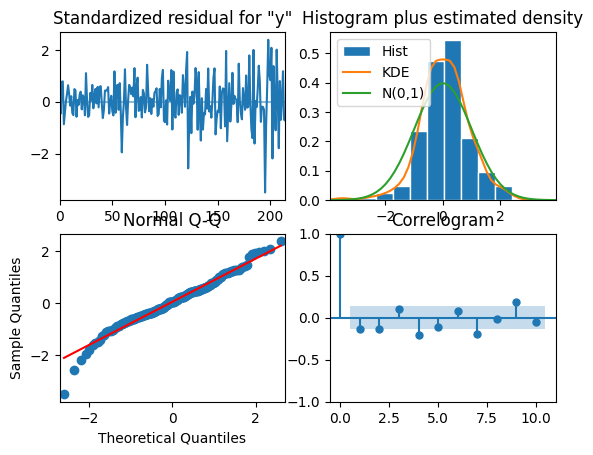

In [54]:
model_fit.plot_diagnostics()

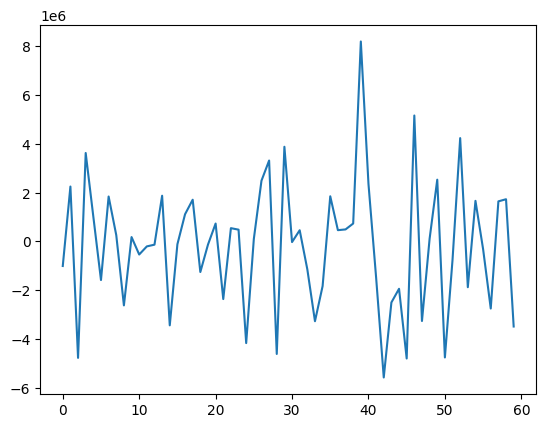

ADF Statistic: -8.948671
p-value: 0.000000
A série é estacionária


In [55]:
residuos=predictions-test.values
plt.plot(residuos)
plt.show()
result1 = adfuller(residuos)
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])
print('A série é estacionária' if result1[1] < 0.05 else 'A série não é estacionária')

In [56]:
df = pd.read_csv("uf.csv", sep=",")
grouped = df.groupby(["ano", "mes"])["consumo"].sum().reset_index()
grouped["data"] = pd.to_datetime(grouped["ano"].astype(str) + "-" + grouped["mes"].astype(str), format="%Y-%m")
grouped["meses"] = (grouped["data"].dt.year - grouped["data"].dt.year.min()) * 12 + grouped["data"].dt.month
grouped = grouped.sort_values(by=["data"])
grouped = grouped.set_index("data")
grouped.index = pd.DatetimeIndex(grouped.index.values,freq=grouped.index.inferred_freq)
dfpib = pd.read_csv("pib.csv", sep=";")
dfpib['PIB'] = dfpib['PIB'].astype(float)

In [57]:
grouped = pd.merge(grouped, dfpib[['Data', 'PIB']], left_on='ano', right_on='Data', how='left')
grouped.drop('Data', axis=1, inplace=True)

In [126]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

# Dividindo os dados em conjuntos de treinamento e teste
n_test = 60
data = grouped['consumo']
train, test = data[:-n_test], data[-n_test:]
exog_train, exog_test = grouped['PIB'][:-n_test], grouped['PIB'][-n_test:]

# Configurando os parâmetros do modelo SARIMA
order = (1, 1, 1)
seasonal_order = (0, 1, 1, 12)

model = SARIMAX(train, exog=exog_train, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)
forecast = model_fit.get_forecast(steps=len(test),exog=exog_test)
forecast_ci = forecast.conf_int()
predictions = forecast.predicted_mean

plt.plot(train, label='Dados de treino')
plt.plot(test, label='Dados de teste')
plt.plot(test.index, predictions, label='Valor predito')
plt.legend()
plt.show()

# Calculando o erro medio quadratico (RMSE)
rmse = np.sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
mae = mean_absolute_error(test,predictions)
print('MAE: %f' % mae)
mape = np.mean(np.abs((test - predictions) / test)) * 100
print('MAPE: %f%%' % mape)

C:\Users\piste\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 3007967.717
MAE: 2057546.207976
MAPE: 1.978733%


In [127]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            consumo   No. Observations:                  156
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2289.225
Date:                            Sun, 14 May 2023   AIC                           4588.449
Time:                                    13:16:01   BIC                           4603.263
Sample:                                         0   HQIC                          4594.469
                                            - 156                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PIB         6.241e-06   2.38e-07     26.198      0.000    5.77e-06    6.71e-06
ar.L1          0.4265      0.192      2.221      0.026       0.050       0.803
ma.L1         -0.6167      0.184     -3.350      0.001      -0.977      -0.256
ma.S.L12      -0.5432      0.035    -15.453      0.000      -0.612      -0.474
sigma2      3.663e+12   1.28e-14   2.85e+26      0.000    3.66e+12    3.66e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               384.69
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                            -1.33
Prob(H) (two-sided):                  0.17   Kurtosis:                        10.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.74e+43. Standard errors may be unstable.
"""

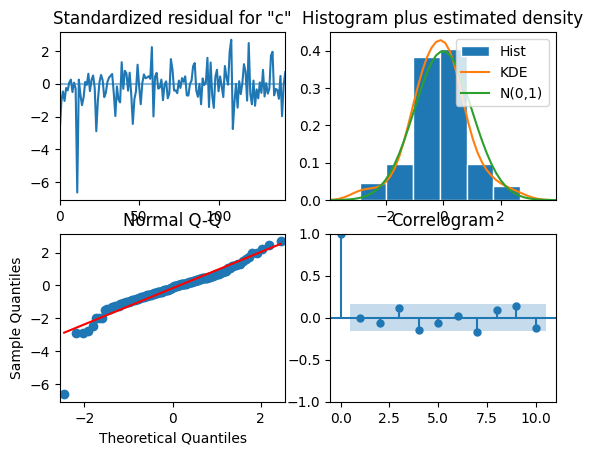

In [128]:
model_fit.plot_diagnostics()

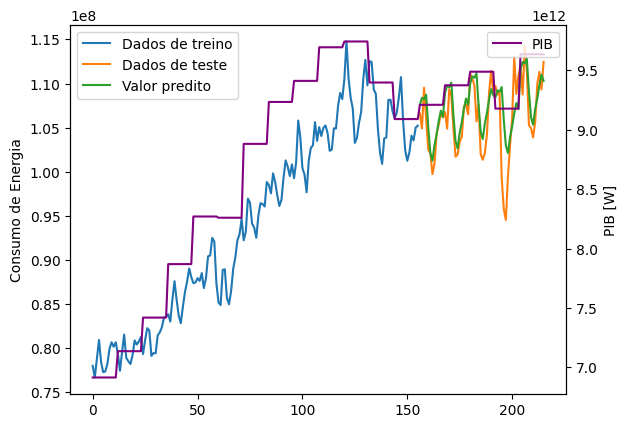

In [129]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(train, label='Dados de treino')
ax1.plot(test, label='Dados de teste')
ax1.plot(test.index, predictions, label='Valor predito')
ax1.set_ylabel('Consumo de Energia')
ax2.plot(grouped['PIB'], color='purple', label='PIB')
ax2.set_ylabel('PIB [W]')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()